<a href="https://colab.research.google.com/github/ernestopalacios/07MBID/blob/main/AG1_ErnestoPalacios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>PRÁCTICA 1: APRENDIZAJE NO SUPERVISADO (DengAI)<center>

**Nombre y apellidos:** Ernesto Vladimir Palacios Merino

**Usuario VIU:** epalaciosm@student.universidadviu.com

---
# Resumen
---

### Características del Dataset:

En esta sección realizaremos un breve análisis de cada unoa de las características del dataset.


**Variables de Tiempo**

- `year` : Año
- `weekofyear` : Semana (52 semanas en un año)
- `week_start_date` : Fecha en la que inicia la semana

Cada observación de nuestro dataset posiblemente es un resumen semanal.

Como primer paso, nos podemos dar cuenta de que tanto la variable "año" como "semana" estan contenidas dentro de `week_start_date`.

Conservaremos la variable `year` la cual resulta útil al momento de generar las gráficas.



**Ciudad**: sj, iq
- Una opción a explorar es la de partir este dataset en dos, uno para cada ciudad, si consideramos que las condiciones son particulares para cada ciudad
- Otra opción es eliminar esta etiqueta, si consideramos que no hay diferencias significativas entre ambas ciudades en lo que tiene que ver a la proliferación de mosquitos.



 **San Juan de Puerto Rico**

> En el plano económico, es el más importante centro económico e industrial de Puerto Rico, y su área metropolitana concentra la mayor parte de la actividad económica de la isla. 340,903 habitantes(2022)
>
> Altitud: (ciudad costera)
>
> 20 m.s.n.m.


**Iquitos, Perú**

> Era la metrópoli más grande de la Amazonía peruana sólo superada por Pucallpa y es la séptima ciudad más poblada del país, con una población de 479 866 habitantes.
>
> Altitud	 (ciudad amazónica)
>
> • Media	105 m s. n. m.
>
> • Máxima	220 m s. n. m.
>
> • Mínima	70 m s. n. m.



**Variables de Temperatura**

- `station_max_temp_c` – Maximum temperature
- `station_min_temp_c` – Minimum temperature
- `station_avg_temp_c` – Average temperature
- `station_diur_temp_rng_c` – Diurnal temperature range
- `reanalysis_dew_point_temp_k` – Mean dew point temperature
- `reanalysis_air_temp_k` – Mean air temperature
- `reanalysis_max_air_temp_k` – Maximum air temperature
- `reanalysis_min_air_temp_k` – Minimum air temperature
- `reanalysis_avg_temp_k` – Average air temperature
- `reanalysis_tdtr_k` – Diurnal temperature range

En el dataset existen 10 diferentes medidas de temperatura, posiblemente podamos reducirlas, con el objetivo de reducir la dimensionalidad del Dataset.



**Variables de Humedad**

- reanalysis_dew_point_temp_k – Mean dew point temperature (temperatura de rocio)*
- reanalysis_relative_humidity_percent – Mean relative humidity
- reanalysis_specific_humidity_g_per_kg – Mean specific humidity


>La temperatura de punto de rocío es la temperatura a la que un volumen dado de aire debe enfriarse para saturarse con vapor de agua. Cuando el aire se enfría por debajo de este punto, su capacidad de humedad disminuye y el vapor de agua en el aire se condensa en agua líquida, formando rocío. Si la temperatura baja aún más, en lugar de rocío, puede formarse escarcha. El punto de rocío depende de la humedad del aire: cuanto más contenido de humedad tenga, más alto será el punto de rocío. La mayoría de las personas encuentran cómoda una temperatura de punto de rocío de 60°F (16°C) o menos.


**Variables de precipitaciones**

- station_precip_mm – Total precipitation
- precipitation_amt_mm – Total precipitation
- reanalysis_sat_precip_amt_mm – Total precipitation
- reanalysis_precip_amt_kg_per_m2 – Total precipitation


**Variables de vegetación**
- ndvi_se – Pixel southeast of city centroid
- ndvi_sw – Pixel southwest of city centroid
- ndvi_ne – Pixel northeast of city centroid
- ndvi_nw – Pixel northwest of city centroid

Esta variable nos habla de la presencia de vegetación en la zona, en principio podriamos combinar estas variables en una sola, una posible razón para mantenerlo separado sería si consideramos que como toda ciudad, existirán zonas con mayor o menor población.

En el caso de combinarlas considero dos opciones:

- Promediar los valores: obtener una medida promedio de la ciudad
- Sumar los valores: obtener un valor máximo de vegetación para la ciudad

Me inclino más por la segunda opción, ya que un aumento significativo en un sector combinado con un decremento puede verse "enmascarado" con un promedio, pero una sumatoria nos brindará **un verdadero valor máximo para cuando normalicemos nuestra variable**


---

### Planificación de Actividades.

1. Analisis inicial:
   - Para entender mejor el dataset exploraremos su distribución en el tiempo
   - Reriramos la columna `weekofyear` una vez que hemos verificado que no hay semanas faltantes.
   - Convertimos la colimna `week_start_date` a tipo `DateObject`
   - Convertimos los datos de temperatura de tal manera que todos se lean en `Centigrados`

2. Tratamientos de valores perdidos:
   - Visualización de los datos faltantes.
   - Analizamos los valores agrupandolos por cada tipo: vegetación, temperatura, humedad, precipitación.
   - Existen 1456 observaciones, por lo que, si los datos faltantes son esporádicos, se considerá que no tendrán gran impacto en el modelo obtenido.
   - En todos los casos se utiliza el método de interpolación lineal para rellenar datos faltantes, esto debido a que los datos evolucionan en el tiempo, y el dato anterior y siguiente tienen la información necesaria del dato faltante.

3. Rellenar valores faltantes.
   - Mecanismo: realizamos un subset copia con las variables que nos interesa, las interpolamos y analizamos, el resultado de nuestro análisis lo volvemos a integrar al dataset original y eliminamos los valores redundantes. No es la más eficiente de las formas, pero nuestro dataset es pequeño y la memoria RAM no es una preocupación.
   
   - Vegetación: realizamos una interpolación lineal rellenando los datos de columna para luego realizar una sumatoria con todos los cuadrantes de la ciudad. **Preferimos una sumatoria a un promedio con la finalidad de tener una mayor desviación estandar**. (Posiblemente nos de lo mismo que un promedio cuando más adelante normalicemos nuestra variable)  Finalmente retiramos las columnas originales de nuestro dataset.
   
   - Temperatura: Primero analizamos los datos `Rea` y `station` por separado, finalmente nos quedamos con dos columnas: `rea_max` y `rea_min`. Retiramos las columnas de temperatura que no usaremos. Para el rango de temperatura diurna hemos optado por mantener las mediciones de estación. `station_duir_tmp_rng_C`

   - Humedad: Una vez analizados los valores se determinó que la varible a utilizar será: `dew_point`

   - Precipitaciones: Al igual que en humedad hay dos columnas que miden lo mismo, sin embargo este es el dato con los outliers más "ruidosos". Finalmente se opta por poner un límite 'cap' al mayor valor de esta variable. En el análisis intercuartil notamos que cada variable mide mas o menos lo mismo.


6. Análisis de Correlación

   - Una vez se han reducido las variables similares realizaremos un análisis de correlación que nos permita identificar relaciones entre nuestras variables.

   - Hemos optado por un analisis de correlación entre ciudades, encontrando similitudes y diferencias en las varaibles caracteristicas de cada ciudad.

   - En este paso visualizamos la distribución de propabilidad de cada variable y además realizamos gráficas boxplot.

7. Tratamiento de Outliers:
   
   - Tomando como referencia las graficas de distribución se toma la decisión de modificar el dataset limitando los valores de precipitación máximo. (Otra opción a explorar es un método logarítmico, pero al ser tan pocos los outliers hemos optado por un mecanismo más directo)

   - Solo se modifica los outliers de las variables de precipitación.

8. Estandarización (normalización) de variables.

   - Se ha decidido realizar la normalización luego del tratamiento de outliers para que los valores no se vean muy comprimidos al momento de normalizar.

   - Una vez normalizados realizamos una gráfica de correlación que nos permita visualizar y entender de una mejor manera la relación entre variables

   - Aquí empezamos a visualizar dos grandes grupos, en las variables que distinguen las dos ciudades que se encuentran en el dataset.

9. Clustering

   - Algoritmo Jerarquico: Aun encontramos evidencias de los outliers al momento de ejecutar este algoritmo, sin embargo no considero que sea un problema.

   Se puede identificar cuatro grupos claramente definidos graficamente.

   - K-means: ejecuamos el algoritmo k-means en las siete variables. aqui no podemos visualizar los resultados, sin embargo, realizamos un proceso análitico para entender los resultados.

   - Análisis de clusters: El análisis de Knee Point nos sugiere la presencia de seis clusters. El análisis de silueta nos sugiere 4 o 5.

   Basándonos en los resultados jerarquicos consideramos que se puede dividir el dataset en cuatro grupos y exploramos la posibilidad de que sean cinco.

10. PCA - Principal Component Análisis

   - Se ha decidido ejecutar esta técnica hasta este punto con la finalidad de tener una mayor variedad en los datasets y un mejor entendimiento de sus variables.

   - Con la finalidad de poder visualizar los datos, y también analizando las características de las variables realizamos el análisis PCA con la finalidad de reducir la dimensionalidad a tres variables principales.

   - K-mans (PCA) - Volvemos a ejecutar esta técnica de clustering, esta vez sobre las variables PCA, y visualizamos los resultados.

   - DBSCAN (PCA) - No se pudo particionar el dataset en más de dos grades clusters, es posible que esta no sea la técnica adecuada, o que el tiempo (hiper-parametros) dedicado a esta técnica no fue el suficiente.

11. Conclusiones.

   - Nuestra apuesta más segura hasta el momento es la técnica de **K-Means** sobre las tres variables obtenidas del **PCA** dividiendo nuestro dataset en **cuatro clústers**.

   - He llegado a esta conclusión luego de observar en el análisis jerarquico la presencia de estos cuatro grandes grupos.

   - Es importante tener un conocimiento adecuado de nuestras variables. No debemos verlos como los ve el computador, no son sólo números, nuestro rol es de conocer que representan, como se han recolectado, las limitaciones de los sensores utilizados, es con esta información (y si no la tenemos consultar con un experto en la materia) que nos permitirá tomar decisiones sobre como tratar los datos.

   - La Exploración y preparación de los datos es vital y las técnicas que utilicemos dependerán mucho sobre las transformaciones previas de los datos. Esto resulto evidente ya que inicialmente realice un análisis jerarquico sin considerar los valores 'outliers' y el resultado fue muy pobre.

   Trabajo Futuro:

   - Una mejor visualizción de los datos en 3D. Como se muestra en esta guía: [Interactive 3d Scatter Plot using Plotly](https://youtu.be/S_xVyF-hwZQ?t=231)

   - Una mejor interpretación de los datos basando en las ciudades. No me dió tiempo pero supongo que los dos grandes grupos observados en k-menas y DBscan se deben a las dos ciudades, pude haber visto sus centroides y análizado la frecuencia de la variable `city_bin`.

   - Un mejor tratamiento de outliers. Me quedo pendiente utilizar una verdadera técnica para el tratamiento de outliers.

   - Analisis de serie de tiempo. En todo el tratamiento y análisis no fue considerada una de las principales dimensiones. El tiempo. Considero muy necesario para este dataset el analizar y entender la evolución de los datos en el tiempo.




---
# Inicialización
---

In [1]:
# Imports generales
import pandas as pd
import numpy as np
import sklearn as skl
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns


seed = 42  # Semilla aleatoria arbitraria y constante a incluir en los algoritmos estocásticos para que los experimentos sean siempre reproducibles por el profesor.

def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)
    return df

In [2]:
# Subir el conjunto de entrenamiento sin variable objetivo (dengue_features_train.csv)
train = upload_files()
print(train.shape)
train.head()

Saving dengue_features_train.csv to dengue_features_train.csv
User uploaded file "dengue_features_train.csv" with length 287139 bytes
(1456, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


Mostrar información del dataset. Una visualización genérica de las observaciones y de las variables

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

---
# Exploración
---

## 1. Analisis de Fechas

Analizaremos los años y las semanas en cada año en la que se han recolectado los datos.

In [4]:
sj_df = train[train['city'] == 'sj']
iq_df = train[train['city'] == 'iq']
sj_df['year'].value_counts()

year
1999    52
1991    52
2005    52
2004    52
2003    52
2002    52
2001    52
2000    52
1998    52
2007    52
1997    52
1996    52
1995    52
1994    52
1993    52
1992    52
2006    52
1990    35
2008    17
Name: count, dtype: int64

In [5]:
iq_df['year'].value_counts()

year
2001    52
2002    52
2003    52
2004    52
2005    52
2006    52
2007    52
2008    52
2009    52
2000    26
2010    26
Name: count, dtype: int64

**Verificamos los datos de fecha para cada ciudad:**
```
San Juan: desde 1990 hasta el 2008, son 18 años
Iquitos: desde el 2000 hasta el 2010, son 10 años.
```
Los Datos se solapan desde el 2000 hasta el 2008, es decir durante estos años existen datos para ambas ciudades

In [6]:
# Retiramos la columna de año y semana
train.drop('weekofyear', axis = 1, inplace = True)

In [7]:
# Convertimos la columna de fecha de inicio de String a DateObject
train['week_start_date'] = pd.to_datetime(train['week_start_date'])

# Convertir datos de temperatura a Celsius
train[['reanalysis_avg_temp_k','reanalysis_dew_point_temp_k', 'reanalysis_air_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k']] -= 273.15

In [8]:
# Mostramos menos decimales
pd.set_option("display.precision", 3)
train.sample(10)

,city,year,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1023,iq,2002,2002-03-05,3.184e-01,0.256,0.266,0.297,92.84,25.390,26.807,...,160.10,91.221,92.84,18.361,8.971,27.850,13.200,35.7,21.0,48.3
1151,iq,2004,2004-08-19,3.931e-01,0.329,0.277,0.389,23.78,24.670,26.836,...,7.90,78.481,23.78,14.961,14.286,NaN,NaN,NaN,21.7,0.5
269,sj,1995,1995-07-02,2.319e-01,0.211,0.241,0.266,2.04,27.530,27.657,...,13.70,79.380,2.04,18.207,2.757,29.214,6.343,33.9,24.4,15.8
913,sj,2007,2007-11-19,NaN,NaN,0.204,0.156,73.37,26.671,26.736,...,43.40,78.526,73.37,17.187,2.514,26.900,6.200,31.1,22.8,40.4
672,sj,2003,2003-04-02,9.250e-02,-0.051,0.130,0.121,0.00,25.750,25.893,...,7.50,76.134,0.00,15.730,3.371,26.700,6.986,33.3,22.2,30.0
641,sj,2002,2002-08-27,9.000e-04,-0.004,0.196,0.119,18.67,27.987,28.107,...,15.00,76.189,18.67,17.973,2.771,28.643,6.429,32.2,24.4,13.5
1040,iq,2002,2002-07-02,1.015e-01,0.127,0.119,0.076,3.27,21.486,21.743,...,6.20,85.566,3.27,13.454,8.700,26.275,9.500,32.6,20.7,5.1
294,sj,1995,1995-12-24,NaN,0.036,0.181,0.112,0.00,25.044,25.071,...,40.30,77.637,0.00,15.371,1.700,25.714,5.857,30.0,22.2,53.9
469,sj,1999,1999-05-07,6.400e-02,0.048,0.172,0.190,88.20,26.281,26.350,...,13.30,78.683,88.20,16.796,2.086,28.229,9.214,33.9,22.2,0.5
284,sj,1995,1995-10-15,4.083e-02,0.097,0.132,0.138,45.63,26.390,26.414,...,53.98,84.207,45.63,18.139,1.814,28.386,6.929,32.2,24.4,19.1


## Tratamiento de valores perdidos

En esta sección visualizaremos los datos faltantes en el dataset.

Analizaremos los datos agrupando variables similares.

Al tratarse de una serie temporal, el método para rellenar datos faltantes será una interpolación lineal vertical de cada columna.

In [9]:
# Visualizamos los datos faltantes: null_data, dataset con al menos una observacion faltante
null_data = train[train.isnull().any(axis=1)]
null_data.info() # mientras nemor el número mayor datos faltantes

<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, 5 to 1444
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   257 non-null    object        
 1   year                                   257 non-null    int64         
 2   week_start_date                        257 non-null    datetime64[ns]
 3   ndvi_ne                                63 non-null     float64       
 4   ndvi_nw                                205 non-null    float64       
 5   ndvi_se                                235 non-null    float64       
 6   ndvi_sw                                235 non-null    float64       
 7   precipitation_amt_mm                   244 non-null    float64       
 8   reanalysis_air_temp_k                  247 non-null    float64       
 9   reanalysis_avg_temp_k                  247 non-null    float64       


```
Las primeras conclusiones:
- no existen datos faltantes en variables de tiempo y ciudad
- la mayor cantidad de faltantes es en: ndvi_ne
```




##### Vegetacion

Esta variable puede tener valors positivos en proporción a la vegetación percibida, y también valores negativos en los casos de detectarse áreas secas y/o oceanos, recordamos que san Juan es una ciudad costera. e Iquitos esta en las riveras del río Amazonas y sus afluentes.

In [10]:
train[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
count,1262.000,1404.000,1434.000,1434.000
mean,0.142,0.131,0.204,0.202
std,0.141,0.120,0.074,0.084
min,-0.406,-0.456,-0.016,-0.063
25%,0.045,0.049,0.155,0.144
50%,0.129,0.121,0.196,0.189
75%,0.248,0.217,0.249,0.247
max,0.508,0.454,0.538,0.546


In [11]:
"""
   Operaciones para interpolar valores faltantes de vegetación
"""
df_vegetacion = train[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].copy()
df_vegetacion.interpolate( inplace = True )
df_vegetacion.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
count,1456.000,1456.000,1456.000,1456.000
mean,0.131,0.128,0.203,0.202
std,0.137,0.119,0.074,0.083
min,-0.406,-0.456,-0.016,-0.063
25%,0.037,0.048,0.154,0.144
50%,0.116,0.116,0.196,0.190
75%,0.231,0.213,0.247,0.247
max,0.508,0.454,0.538,0.546



```
Hemos rellenado los valores de vegetación interpolando verticalmente los valores faltantes,
esto ha modificado nuestro promedio y desviación estandar en el campo [ndvi_ne]
En la siguiente operación realizaremos la sumatoria de todos los cuadrantes en la ciudad
```



In [12]:
"""
   Colapsamos los valores de vegetación a una sola columna
"""
train['ndvi'] = df_vegetacion.sum(axis=1) # Optamos por la sumatoria en lugar del promedio
train[['ndvi','ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].describe()


,ndvi,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
count,1456.000,1262.000,1404.000,1434.000,1434.000
mean,0.664,0.142,0.131,0.204,0.202
std,0.364,0.141,0.120,0.074,0.084
min,-0.370,-0.406,-0.456,-0.016,-0.063
25%,0.400,0.045,0.049,0.155,0.144
50%,0.588,0.129,0.121,0.196,0.189
75%,0.902,0.248,0.217,0.249,0.247
max,2.016,0.508,0.454,0.538,0.546


In [13]:
# Retiramos los cuadrantes de vegetación, manteniendo unicamente la sumatoria de la ciudad
train.drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], axis = 1, inplace = True)

#### Temperatura

Contamos con varias columnas con datos de tempeartura, buscaremos rellenar los datos faltantes interpolando linealmente

In [14]:
df_rea_temp = train[['reanalysis_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_max_air_temp_k','reanalysis_avg_temp_k']].copy()
df_rea_temp.describe()

,reanalysis_air_temp_k,reanalysis_min_air_temp_k,reanalysis_max_air_temp_k,reanalysis_avg_temp_k
count,1446.000,1446.000,1446.000,1446.000
mean,25.552,22.569,30.277,26.076
std,1.362,2.565,3.235,1.262
min,21.486,13.750,24.650,21.743
25%,24.509,20.750,27.850,25.107
50%,25.496,23.050,29.250,26.139
75%,26.684,24.750,32.350,27.057
max,29.050,26.750,40.850,29.779


Text(0, 0.5, 'Centigrados')

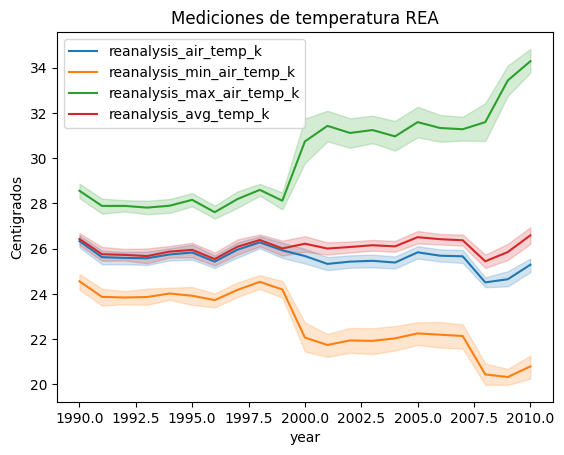

In [15]:
# Plot temperatura rea
ax = plt.subplot()

for tmpt in df_rea_temp:
    sns.lineplot(data=train, x='year', y=tmpt, label=tmpt).set_title("Mediciones de temperatura REA")
ax.set_ylabel("Centigrados")



```
Observando nuestra gráfica podemos sacar algunas conclusiones
- La temperatura promedio y temperatura del aire varian muy poco en relación a la máxima y mínima,
 y son similares entre si
```
Si revisamos la variación estandar tanto para `aire` como para `promedio` es inferior a dos grados centrigrados, esto es un indicio de que estas son variables de aglomeración, lo cual no nos beneficia para nuestro análisis.

Una variable que no cambia en el tiempo no nos va a ser muy útil en nuestro modelo.

Por esta razón **eliminaremos estas dos variables** de nuestro dataset


In [16]:
df_station_temp = train[['station_max_temp_c','reanalysis_max_air_temp_k','station_min_temp_c','reanalysis_min_air_temp_k']].copy()
df_station_temp.describe()

,station_max_temp_c,reanalysis_max_air_temp_k,station_min_temp_c,reanalysis_min_air_temp_k
count,1436.000,1446.000,1442.000,1446.000
mean,32.452,30.277,22.102,22.569
std,1.959,3.235,1.574,2.565
min,26.700,24.650,14.700,13.750
25%,31.100,27.850,21.100,20.750
50%,32.800,29.250,22.200,23.050
75%,33.900,32.350,23.300,24.750
max,42.200,40.850,25.600,26.750


Text(0, 0.5, 'Centigrados')

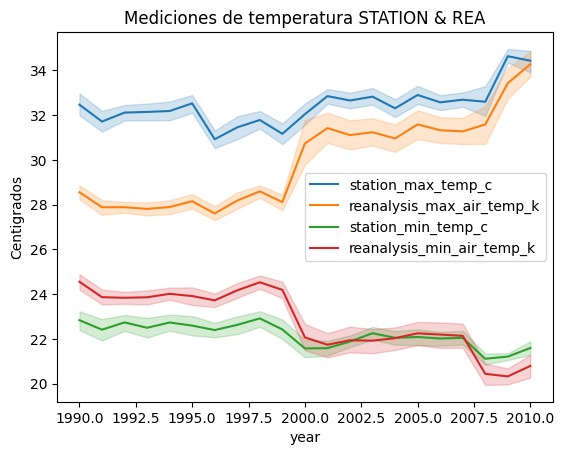

In [17]:
# Plot todas temperaturas
ax = plt.subplot()

for tmpt in df_station_temp:
    sns.lineplot(data=train, x='year', y=tmpt, label=tmpt).set_title("Mediciones de temperatura STATION & REA")
ax.set_ylabel("Centigrados")



```
al observar las mediciones de temperatura podemos concluir:

- Temperaturas mínimas: ambos metodos de medición son similares.
- Temperaturas Máximas: no hay variación sgnificativa en el valor medido en la estación.

```

Una vez analizado los valores de temperatura tenemos las siguientes conclusiones:

Vamos a eliminar las columnas de temperatura de estación y quedanos únicamente con las columnas máximas y mínimas de `Reanalysis`

Para los valores faltantes en esta columna igualmente realizaremos una interpolación en sus columnas

Interesante observar el cambio de temperaturas alrededor del año 1998. No conocemos la causa, pero es algo a tomar en cuenta en futuros análisis.



In [18]:
# Eliminamos columnas de promedio
df_rea_temp.drop(['reanalysis_air_temp_k', 'reanalysis_avg_temp_k'], axis = 1, inplace = True)
df_rea_temp.interpolate( inplace = True )

# Cargamos los valores completos e interpolados en centigrados
train['max_temp_c'] = df_rea_temp['reanalysis_max_air_temp_k']
train['min_temp_c'] = df_rea_temp['reanalysis_min_air_temp_k']

# Eliminamos las columnas de temperatura que ya no necesitamos
train.drop(['reanalysis_air_temp_k','reanalysis_avg_temp_k',
            'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k',
            'station_avg_temp_c', 'station_max_temp_c',
            'station_min_temp_c'], axis = 1, inplace = True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   1456 non-null   object        
 1   year                                   1456 non-null   int64         
 2   week_start_date                        1456 non-null   datetime64[ns]
 3   precipitation_amt_mm                   1443 non-null   float64       
 4   reanalysis_dew_point_temp_k            1446 non-null   float64       
 5   reanalysis_precip_amt_kg_per_m2        1446 non-null   float64       
 6   reanalysis_relative_humidity_percent   1446 non-null   float64       
 7   reanalysis_sat_precip_amt_mm           1443 non-null   float64       
 8   reanalysis_specific_humidity_g_per_kg  1446 non-null   float64       
 9   reanalysis_tdtr_k                      1446 non-null   float64 

In [19]:
temp_range = train[['reanalysis_tdtr_k', 'station_diur_temp_rng_c']].copy()
temp_range.describe()

,reanalysis_tdtr_k,station_diur_temp_rng_c
count,1446.000,1413.000
mean,4.904,8.059
std,3.546,2.129
min,1.357,4.529
25%,2.329,6.514
50%,2.857,7.300
75%,7.625,9.567
max,16.029,15.800


Text(0, 0.5, 'Centigrados')

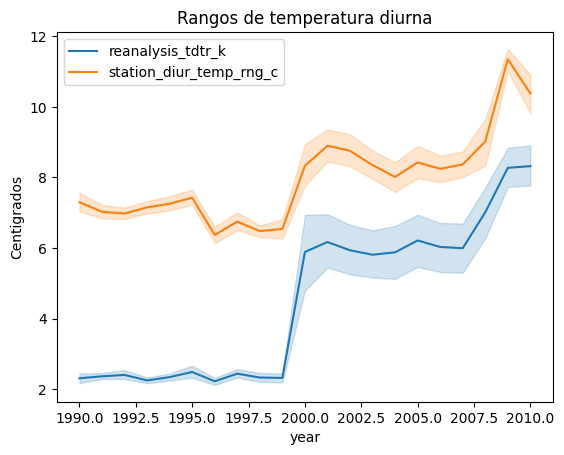

In [20]:
# Graficamos ambas variables para compararlas, buscamos quedarnos con una sola

ax = plt.subplot()

for columna in temp_range:
    sns.lineplot(data=train, x='year', y=columna, label=columna).set_title("Rangos de temperatura diurna")
ax.set_ylabel("Centigrados")

```
Nuevamente aqui tenemos una marcada diferencia entre los tipos de mediciones.

Al igual que en gráficas anteriores de temperatura hay una marcada diferencia en valores anes 2000 y luego del 2000.

Una teoría puede ser que se deba a algún cambio en los equipos de mediciones.
```

En este caso, las mediciones `Rea` se mantienen planas hasta cerca del año 2000 donde tienen una marcada variación, esta misma variación se registra en el rango de temperaturas diurnas medidas en `station`

Debido a que las temperaturas máximas las tomamos de las medicoines `Rea` este cambio viene ya codificado en sus temperaturas, por lo que en esta ocasión mantendremos los datos de la estación local. Además las mediciones `Rea` permanecen 'planas' por la mitad de las mediciones, buscamos variaciones que posiblemente nos permitan explicar los fenómenos de interés.

In [21]:
temp_range.interpolate( inplace = True )
train['temp_range_c'] = temp_range['station_diur_temp_rng_c']
train.drop(['reanalysis_tdtr_k', 'station_diur_temp_rng_c'], axis = 1, inplace = True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   1456 non-null   object        
 1   year                                   1456 non-null   int64         
 2   week_start_date                        1456 non-null   datetime64[ns]
 3   precipitation_amt_mm                   1443 non-null   float64       
 4   reanalysis_dew_point_temp_k            1446 non-null   float64       
 5   reanalysis_precip_amt_kg_per_m2        1446 non-null   float64       
 6   reanalysis_relative_humidity_percent   1446 non-null   float64       
 7   reanalysis_sat_precip_amt_mm           1443 non-null   float64       
 8   reanalysis_specific_humidity_g_per_kg  1446 non-null   float64       
 9   station_precip_mm                      1434 non-null   float64 

#### Humedad

De la mismo forma que lo hicimos con temperatura, analizaremos las variables relacionadas con humedad

Text(0, 0.5, 'Humedad')

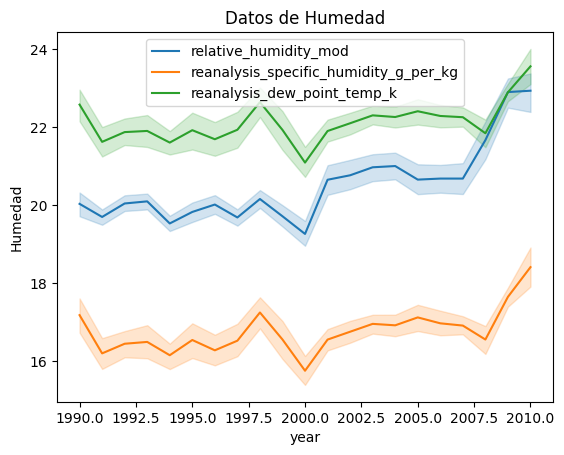

In [22]:
# Para una mejor visualización y comparación modificamos los valores de humedad relativa.

# modificamos la humedad relativa para que nos resulte más fácil la interpretación gráfica.
train['relative_humidity_mod'] = train['reanalysis_relative_humidity_percent'] / 4


df_humedad = train[['relative_humidity_mod',
                    'reanalysis_specific_humidity_g_per_kg',
                    'reanalysis_dew_point_temp_k']].copy()

ax = plt.subplot()
for columna in df_humedad:
    sns.lineplot(data=train, x='year', y=columna, label=columna).set_title("Datos de Humedad")
ax.set_ylabel("Humedad")

In [23]:
df_humedad.interpolate( inplace = True )
df_humedad.describe()

,relative_humidity_mod,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k
count,1456.000,1456.000,1456.000
mean,20.543,16.745,22.095
std,1.788,1.541,1.526
min,14.447,11.716,16.493
25%,19.299,15.555,20.968
50%,20.072,17.084,22.489
75%,21.609,17.976,23.308
max,24.652,20.461,25.300




```
En este caso podemos notar con las graficas que hay dos variables altamente correlacionadas, `dew_point` y `humidity_g_per_kg`

Por lo que la consideración será entre la humedad relativa y la humedad por kilogramo
```
Del gráfico tambien podmos concluir que hay una mayor variación en la variable `dew_point` finalmente será esta nuestra variable de humedad


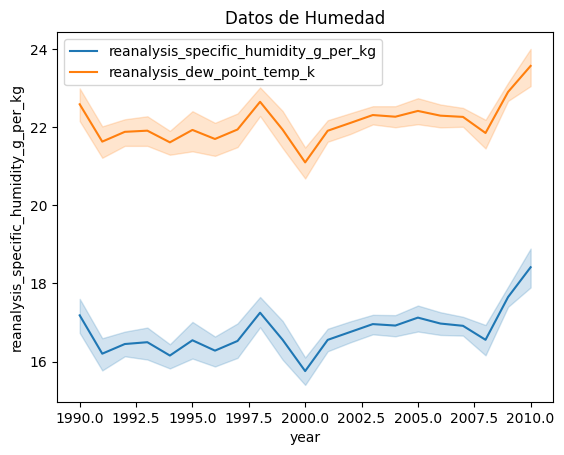

In [24]:
for columna in train[['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k']]:
    sns.lineplot(data=train, x='year', y=columna, label=columna).set_title("Datos de Humedad")

In [25]:
df_humedad.corr()

,relative_humidity_mod,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k
relative_humidity_mod,1.000,0.579,0.555
reanalysis_specific_humidity_g_per_kg,0.579,1.000,0.997
reanalysis_dew_point_temp_k,0.555,0.997,1.000


La correlación entre `rea_dew_point` y `rea_specific_humidity` es prácticamente la misma, mismo datos diferentes unidades.

In [26]:
train['humedad'] = df_humedad['reanalysis_dew_point_temp_k']
train.drop(['relative_humidity_mod','reanalysis_specific_humidity_g_per_kg',
            'reanalysis_dew_point_temp_k','reanalysis_relative_humidity_percent'], axis = 1, inplace = True)


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   city                             1456 non-null   object        
 1   year                             1456 non-null   int64         
 2   week_start_date                  1456 non-null   datetime64[ns]
 3   precipitation_amt_mm             1443 non-null   float64       
 4   reanalysis_precip_amt_kg_per_m2  1446 non-null   float64       
 5   reanalysis_sat_precip_amt_mm     1443 non-null   float64       
 6   station_precip_mm                1434 non-null   float64       
 7   ndvi                             1456 non-null   float64       
 8   max_temp_c                       1456 non-null   float64       
 9   min_temp_c                       1456 non-null   float64       
 10  temp_range_c                     1456 non-null   float64    

### Precipitaciones

In [28]:
df_precipitaciones = train[['precipitation_amt_mm','station_precip_mm', 'reanalysis_sat_precip_amt_mm', 'reanalysis_precip_amt_kg_per_m2']].copy()
df_precipitaciones.describe()

,precipitation_amt_mm,station_precip_mm,reanalysis_sat_precip_amt_mm,reanalysis_precip_amt_kg_per_m2
count,1443.000,1434.000,1443.000,1446.000
mean,45.760,39.326,45.760,40.152
std,43.716,47.455,43.716,43.434
min,0.000,0.000,0.000,0.000
25%,9.800,8.700,9.800,13.055
50%,38.340,23.850,38.340,27.245
75%,70.235,53.900,70.235,52.200
max,390.600,543.300,390.600,570.500


Text(0, 0.5, 'mm lluvia')

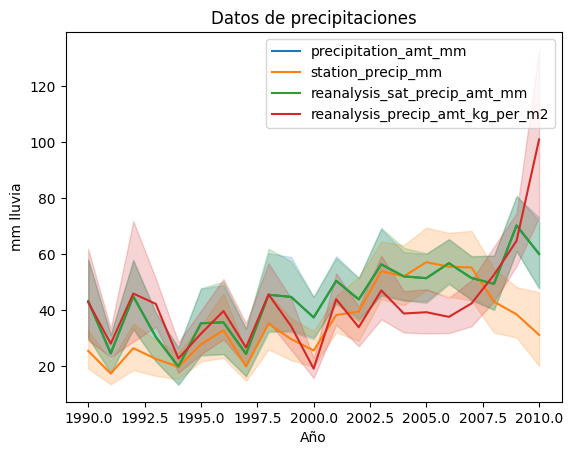

In [29]:
fig, ax = plt.subplots( )

for columna in df_precipitaciones:
    sns.lineplot(data=train, x='year', y=columna, ax=ax, label=columna).set_title("Datos de precipitaciones")
ax.set_xlabel("Año")
ax.set_ylabel("mm lluvia")

Text(0.5, 1.0, 'Mapa de correlacion de Precipitaciones')

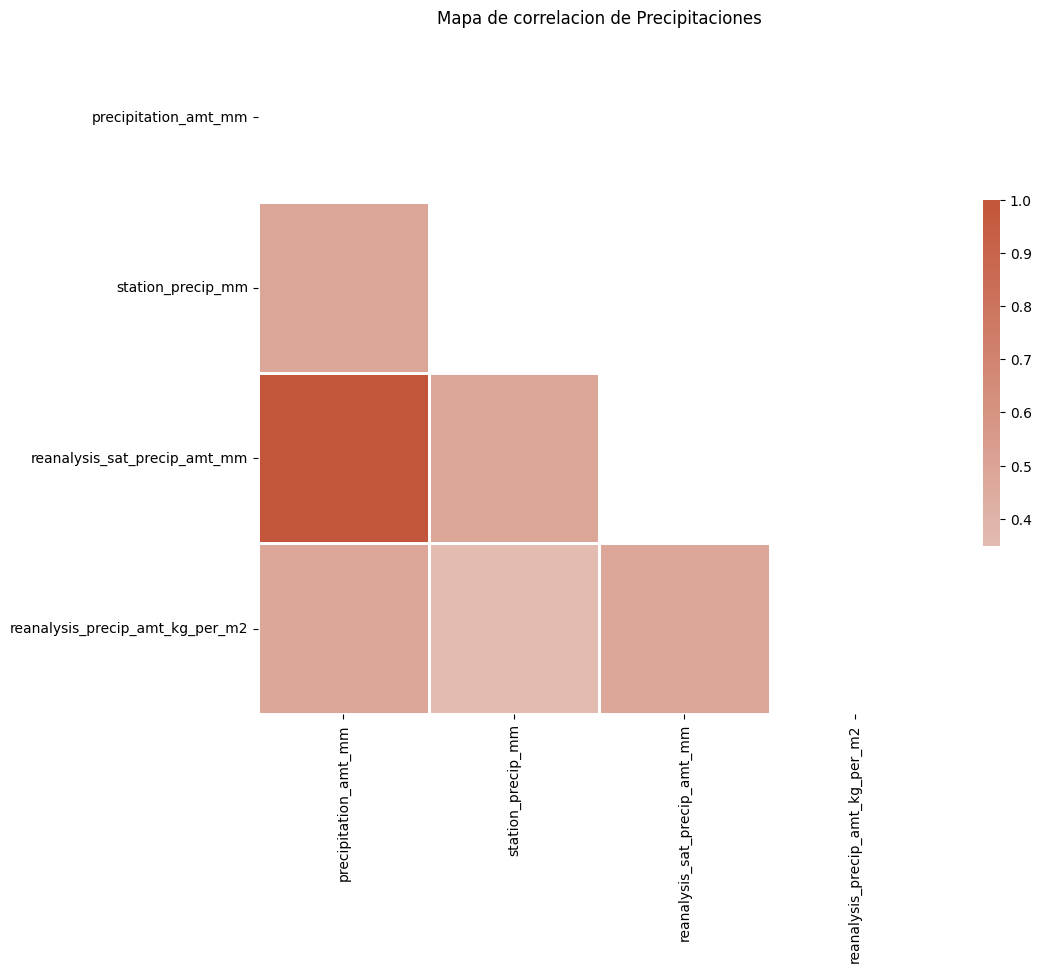

In [30]:
"""
   Creamos un mapa de correlacion con el dataframe df_precipitaciones
"""
# Compute the correlation matrix
corr = df_precipitaciones.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}).set_title("Mapa de correlacion de Precipitaciones")

In [31]:
corr

,precipitation_amt_mm,station_precip_mm,reanalysis_sat_precip_amt_mm,reanalysis_precip_amt_kg_per_m2
precipitation_amt_mm,1.000,0.487,1.000,0.481
station_precip_mm,0.487,1.000,0.487,0.349
reanalysis_sat_precip_amt_mm,1.000,0.487,1.000,0.481
reanalysis_precip_amt_kg_per_m2,0.481,0.349,0.481,1.000


```
Las columnas 'precipitation_amt_mm' y 'reanalysis_sat_precip_amt_mm	1.000' son iguales

Por lo tanto podemos precindier de una de ellas
```

Para las demas variables,siguen una tendencia similar, se puede observar un alto grado de correlación entre ellas. Por ahora realizaremos una interpolacion linean y eliminaremos la columna redundante

In [32]:
df_precipitaciones.interpolate( inplace = True )
train['precipitation_amt_mm'] = df_precipitaciones['precipitation_amt_mm']
train['station_precip_mm'] = df_precipitaciones['station_precip_mm']
train['rea_precip_amt_kg_per_m2'] = df_precipitaciones['reanalysis_precip_amt_kg_per_m2']

train.drop(['reanalysis_sat_precip_amt_mm','reanalysis_precip_amt_kg_per_m2'], axis = 1, inplace = True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   city                      1456 non-null   object        
 1   year                      1456 non-null   int64         
 2   week_start_date           1456 non-null   datetime64[ns]
 3   precipitation_amt_mm      1456 non-null   float64       
 4   station_precip_mm         1456 non-null   float64       
 5   ndvi                      1456 non-null   float64       
 6   max_temp_c                1456 non-null   float64       
 7   min_temp_c                1456 non-null   float64       
 8   temp_range_c              1456 non-null   float64       
 9   humedad                   1456 non-null   float64       
 10  rea_precip_amt_kg_per_m2  1456 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 125.2+ KB


In [33]:
# En este punto convertiré la variable de ciudad a tipo categorica

train['city'] = train['city'].astype('category')

train.head()

,city,year,week_start_date,precipitation_amt_mm,station_precip_mm,ndvi,max_temp_c,min_temp_c,temp_range_c,humedad,rea_precip_amt_kg_per_m2
0,sj,1990,1990-04-30,12.42,16.0,0.602,26.65,22.75,6.900,19.264,32.00
1,sj,1990,1990-05-07,22.82,8.6,0.630,27.75,23.25,6.371,20.801,17.94
2,sj,1990,1990-05-14,34.54,41.4,0.533,27.35,24.15,6.486,22.284,26.10
3,sj,1990,1990-05-21,15.36,4.0,0.837,28.25,23.85,6.771,22.160,13.90
4,sj,1990,1990-05-28,7.52,5.8,0.957,28.75,24.35,9.371,22.671,12.20


## Reusltados

Hasta este punto hemos rellenado los valores faltantes, hemos analizado las variables por categorias, eliminado las columnas que consideramos redundantes y contamos con un dataset de datos completos y de una menor dimensionalidad para continuar con el análisis

---
# Características
---

## Distribucion de variables

A continuación dibujaremos la distribución de los valores de cada variable con el fin de analizar y buscar alguna peculiaridad en los datos.

Nos interesa conocer la figura de la distribución de probabilidades para los valores de cada columna

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

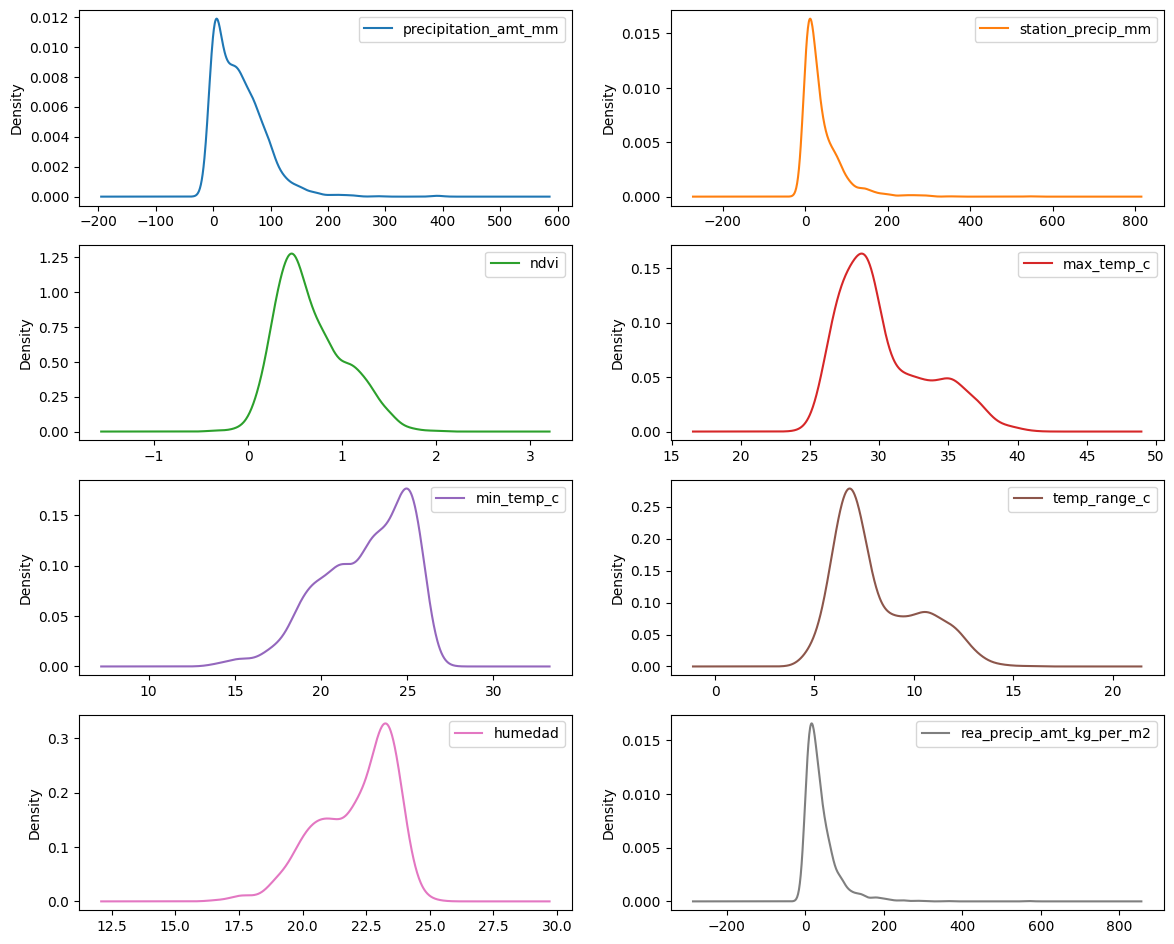

In [34]:
(train.drop(['year','city','week_start_date'], axis=1)
    .plot(kind='kde', subplots=True, figsize=(14, 30), layout=(10, 2), sharex=False))

```
Como ya lo habiamos observado en las graficas lineales,
existe una relación entre la temperatura, humedad, precipitación atmosférica.

En cuanto a la precipitación es posible que tengamos valores de outliers,
que estan distorcionando nuestra percepción de la gráfica. Esto lo podremos
determinar más adelante.
```

## Correlacion entre variables

Para poder continuar consideraremos cada ciudad de manera independiente y luago comparar que tan similares son sus correlaciones


In [35]:
# Aquí divido mi dataset por cada ciudad.

sj_df = train[train['city'] == 'sj']
iq_df = train[train['city'] == 'iq']

Text(0.5, 1.0, 'Mapa de Correlacion arriba "San Juan" abajo "Iquitos"')

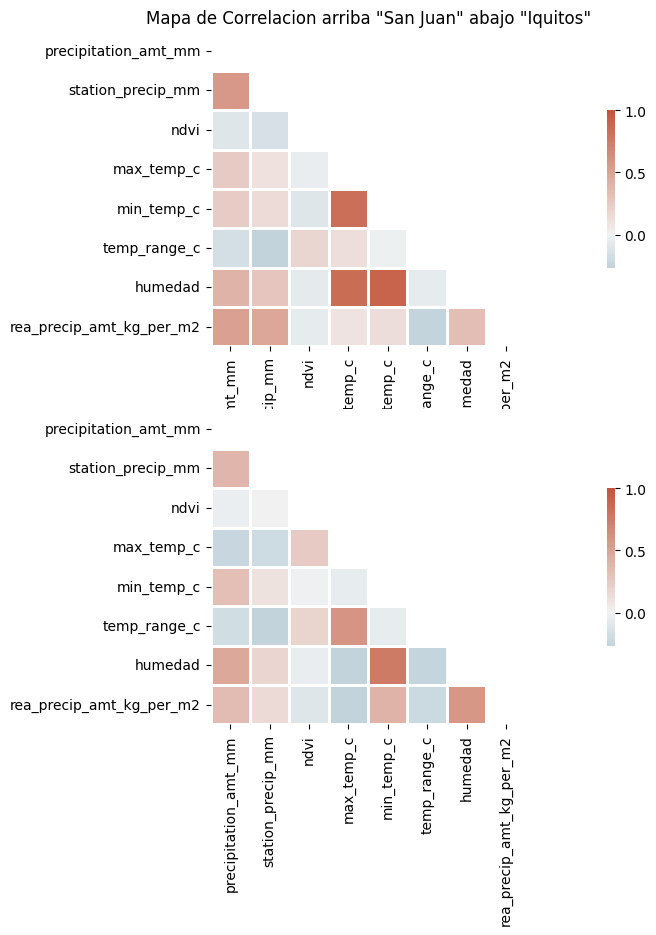

In [36]:
"""
   Creamos un mapa de correlacion con el dataframe train para cada ciudad
"""
# Calcular la matriz de correlación
corr_sj = sj_df.drop(['year','city','week_start_date'], axis=1).corr()
corr_iq = iq_df.drop(['year','city','week_start_date'], axis=1).corr()

# Generar una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr_sj, dtype=bool))

# Creamos los objetos subplot
fig, axs = plt.subplots( 2, 1, figsize = (21, 9))

# Mapeo de color
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Creo las dos gráficas

sns.heatmap(corr_sj, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}, ax=axs[0])
sns.heatmap(corr_iq, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}, ax=axs[1])

axs[0].set_title('Mapa de Correlacion arriba "San Juan" abajo "Iquitos"')

,precipitation_amt_mm,station_precip_mm,ndvi,max_temp_c,min_temp_c,temp_range_c,humedad,rea_precip_amt_kg_per_m2
precipitation_amt_mm,0.000,1.922e-01,-0.062,0.483,-0.080,2.387e-02,-0.071,0.169
station_precip_mm,0.192,0.000e+00,-0.150,0.302,0.050,-7.074e-04,0.098,0.323
ndvi,-0.062,-1.496e-01,0.000,-0.301,-0.091,-1.345e-02,-0.021,0.040
max_temp_c,0.483,3.025e-01,-0.301,0.000,0.878,-4.696e-01,1.102,0.350
min_temp_c,-0.080,4.958e-02,-0.091,0.878,0.000,2.878e-02,0.144,-0.266
temp_range_c,0.024,-7.074e-04,-0.013,-0.470,0.029,0.000e+00,0.191,-0.038
humedad,-0.071,9.762e-02,-0.021,1.102,0.144,1.913e-01,0.000,-0.243
rea_precip_amt_kg_per_m2,0.169,3.231e-01,0.040,0.350,-0.266,-3.831e-02,-0.243,0.000


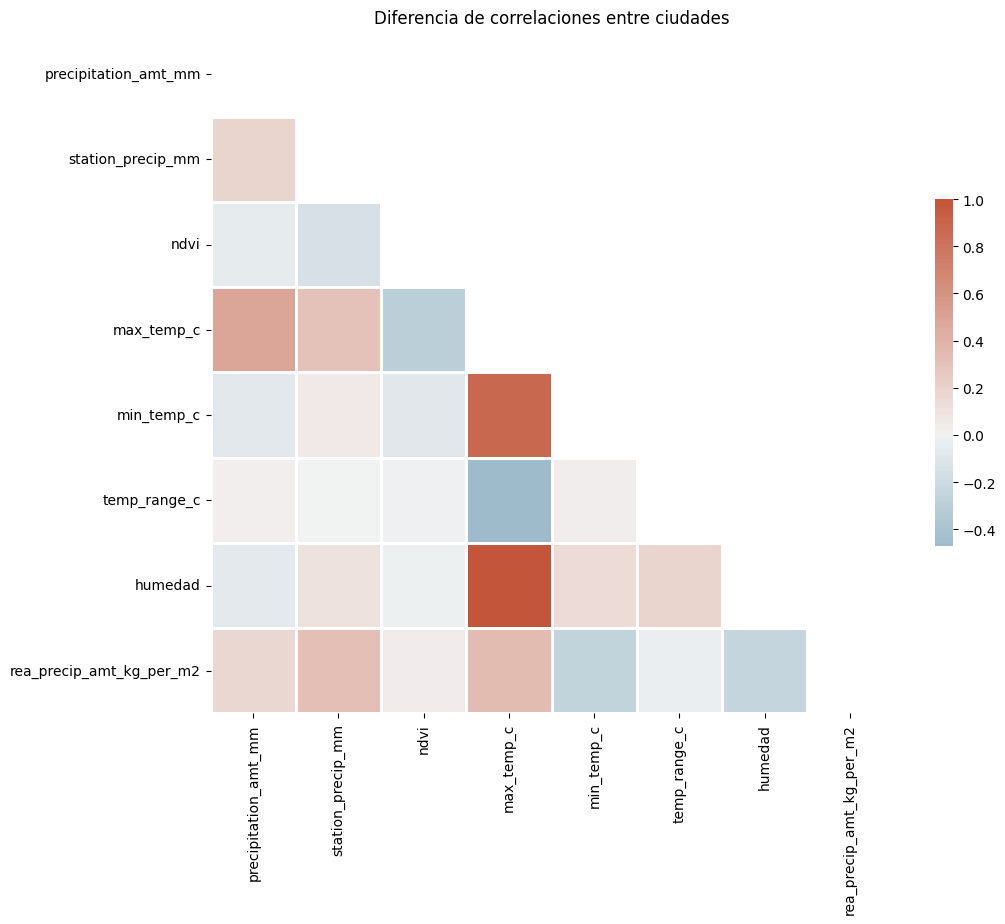

In [37]:
## Diferencias en la correlación

diff_corr = corr_sj - corr_iq

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(diff_corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}).set_title("Diferencia de correlaciones entre ciudades")
diff_corr

```
Al tratarse de ciudades con caracteristicas geograficas diferentes (costa vs amazonía)
encontramos diferencias al comparar entre las relaciones:

  - humedad    ~   temp_maxima
  - temp_min   ~   temp_maxima

Esto es algo que debemos tomar en cuenta si encontramos que estas dos variables tienen
un peso significativo en nuestro modelo
```

En este caso para poder distinguir cada ciudad y hacerlo de una manera que se acople a los algoritmos de cluster debo tener una distinción numérica. La mas sencilla binario, 1/0. Por lo que tiene mucho sentido binarizar mi variable categorica `city`

In [38]:
# Binarizador para la variable categórica city
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
train['city_bin'] = lb.fit_transform(train['city'])

## Tratamiento de Outliers

Hasta este punto hemos disminuido la dimensionalidad ahora exploraremos los outliers

Primeramente visualizaremos los outliers, para ello utilizaremos gráficas de tipo Boxplot

Text(0.5, 1.0, 'Humedad')

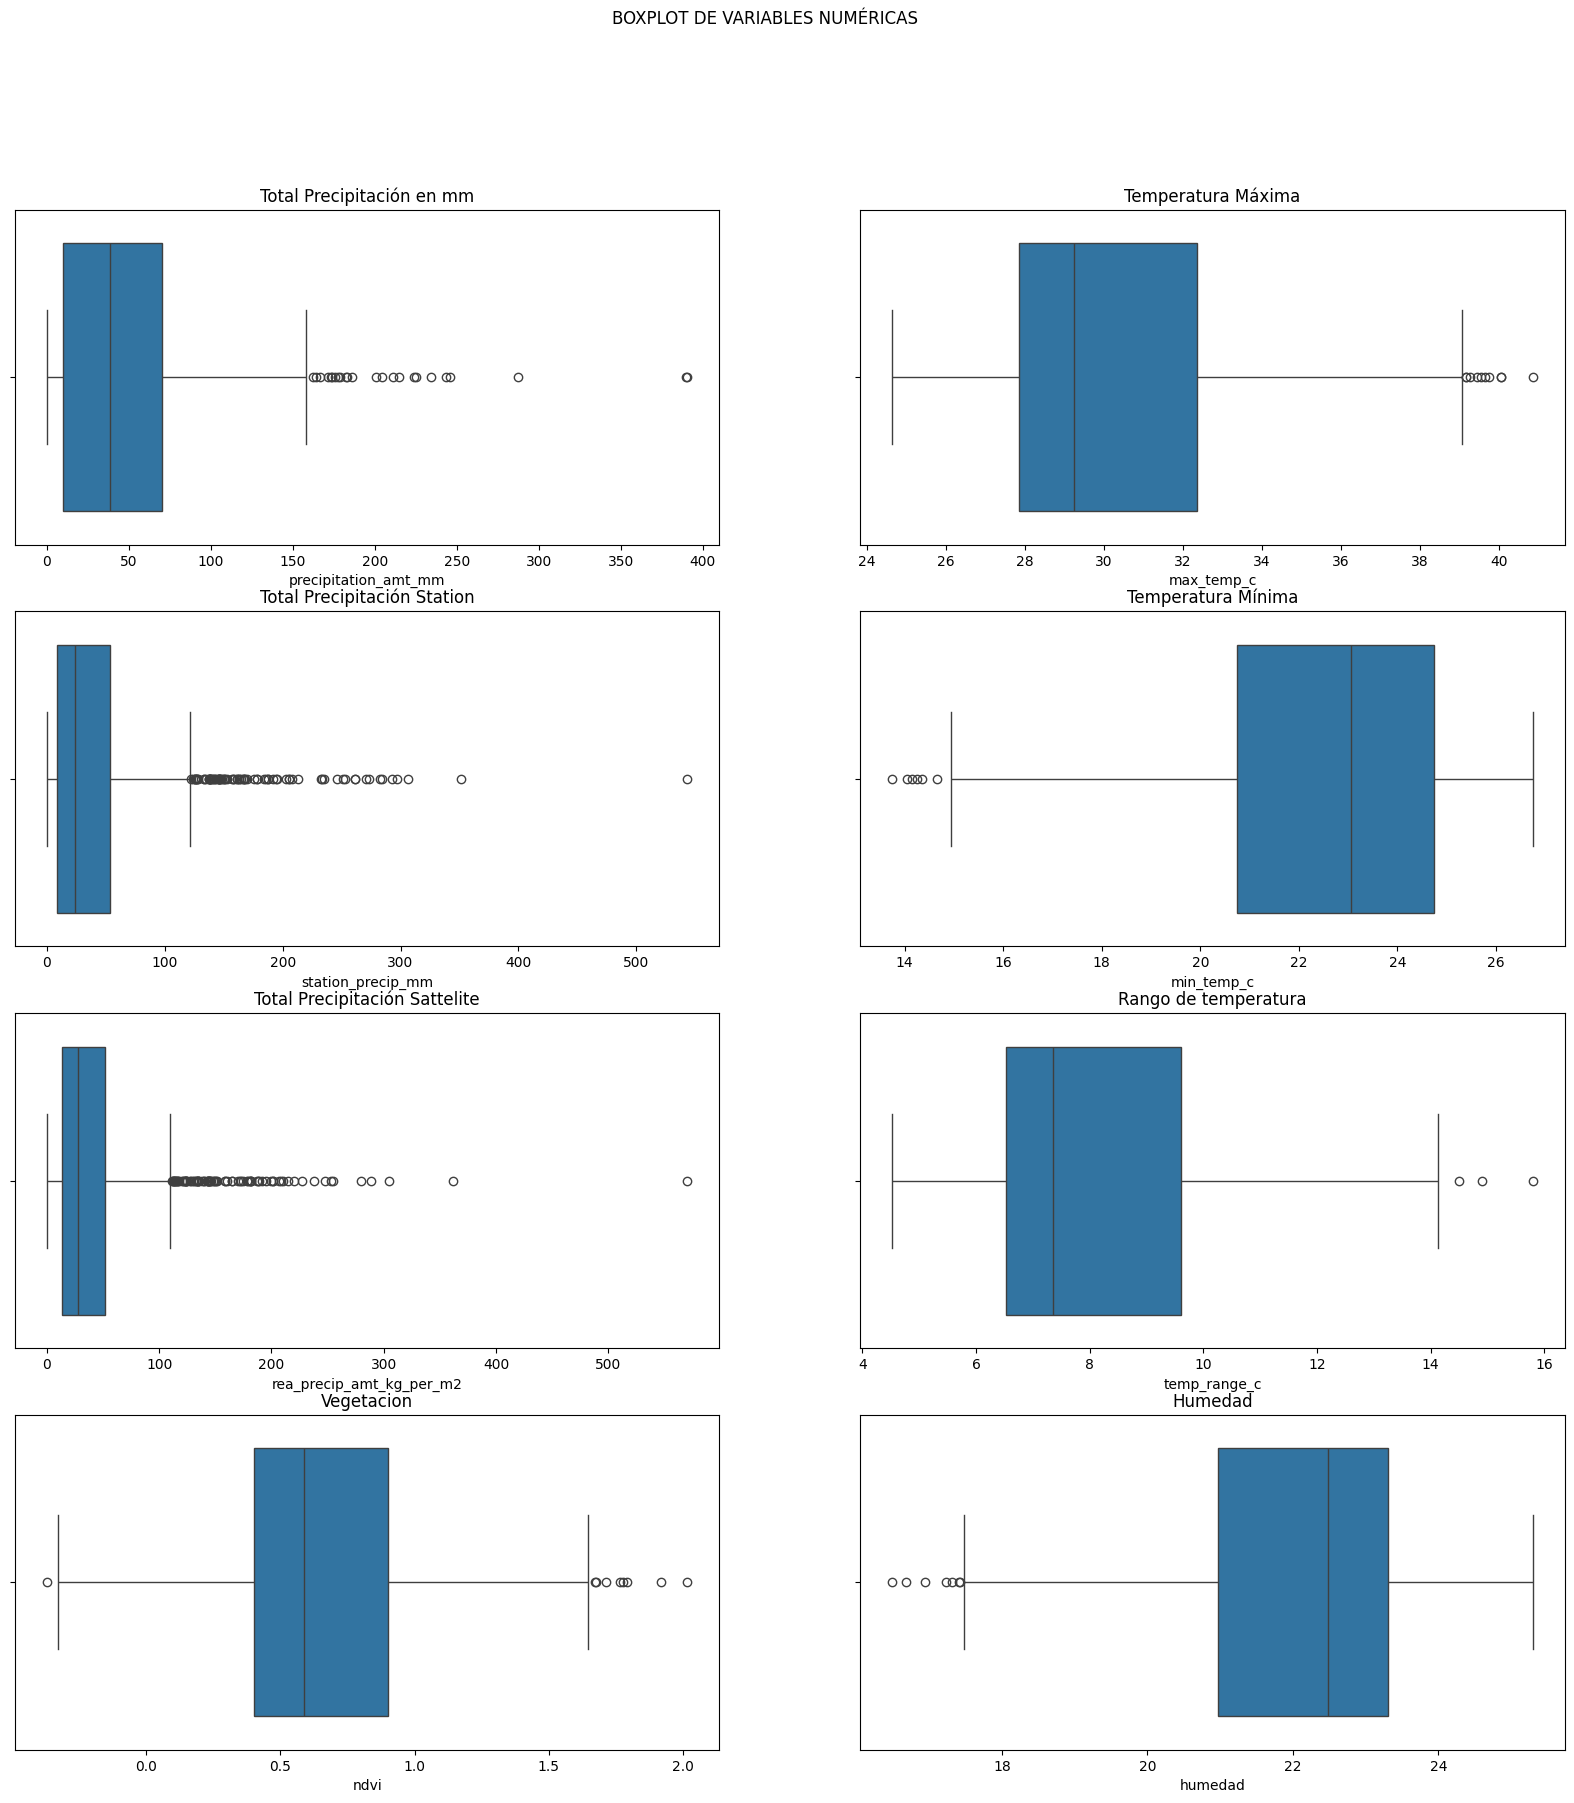

In [39]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
fig.suptitle('BOXPLOT DE VARIABLES NUMÉRICAS')

#precipitation_amt_mm
sns.boxplot(data=train, x='precipitation_amt_mm', ax=axes[0, 0])
axes[0, 0].set_title("Total Precipitación en mm")

#station_precip_mm
sns.boxplot(data=train, x='station_precip_mm', ax=axes[1, 0])
axes[1, 0].set_title("Total Precipitación Station")

#rea_precip_amnt_kg_per_m2
sns.boxplot(data=train, x='rea_precip_amt_kg_per_m2', ax=axes[2, 0])
axes[2, 0].set_title("Total Precipitación Sattelite")

#ndvi
sns.boxplot(data=train, x='ndvi', ax=axes[3, 0])
axes[3, 0].set_title("Vegetacion")

#max_temp_c
sns.boxplot(data=train, x='max_temp_c', ax=axes[0, 1])
axes[0, 1].set_title("Temperatura Máxima")

#min_temp_c
sns.boxplot(data=train, x='min_temp_c', ax=axes[1, 1])
axes[1, 1].set_title("Temperatura Mínima")

#temp_range_c
sns.boxplot(data=train, x='temp_range_c', ax=axes[2, 1])
axes[2, 1].set_title("Rango de temperatura")

#humedad
sns.boxplot(data=train, x='humedad', ax=axes[3, 1])
axes[3, 1].set_title("Humedad")

```
De la gráfica boxplot podemos concluir:

- Las variables de precipitación son las que realmente necesitan
tratamiento de outliers
```

Aquí hare uso de mi experiencia viviendo una ciudad [cercana a la amazonía](https://www.google.com/maps/place/Zamora,+Ecuador/@-2.1373432,-78.5148566,7.04z/data=!4m6!3m5!1s0x91cb1423210c742f:0x9b80306eaae43228!8m2!3d-4.0620941!4d-78.948623!16zL20vMGYyMnFf?entry=ttu), es común recibir lluvias torrenciales por lo que considero que ponerle un techo a la cantidad de milimetros medida no resultará un problema más adelante en nuestro modelo.

Basandonos en las gráficas de Boxplot y de distribución de probabilidad, para las variables de precipitación nuestro límite será de 175 mm.

In [40]:
# limite en unidades de precipitacion
limit_rain = 175

# Visualizamos la distribución. nuestro tercer percentil se encuentra en las 70 unidades
train['precipitation_amt_mm'].describe()

count    1456.000
mean       45.702
std        43.651
min         0.000
25%         9.785
50%        38.320
75%        70.227
max       390.600
Name: precipitation_amt_mm, dtype: float64

In [41]:
#Visualizamos la cantidad de datos que vamos a cambiar
train[train['station_precip_mm'] > limit_rain ].count()

city                        32
year                        32
week_start_date             32
precipitation_amt_mm        32
station_precip_mm           32
ndvi                        32
max_temp_c                  32
min_temp_c                  32
temp_range_c                32
humedad                     32
rea_precip_amt_kg_per_m2    32
city_bin                    32
dtype: int64

In [42]:
train[train['rea_precip_amt_kg_per_m2'] > limit_rain ].count()

city                        29
year                        29
week_start_date             29
precipitation_amt_mm        29
station_precip_mm           29
ndvi                        29
max_temp_c                  29
min_temp_c                  29
temp_range_c                29
humedad                     29
rea_precip_amt_kg_per_m2    29
city_bin                    29
dtype: int64

In [43]:
train[train['precipitation_amt_mm'] > limit_rain ].count()

city                        18
year                        18
week_start_date             18
precipitation_amt_mm        18
station_precip_mm           18
ndvi                        18
max_temp_c                  18
min_temp_c                  18
temp_range_c                18
humedad                     18
rea_precip_amt_kg_per_m2    18
city_bin                    18
dtype: int64

In [44]:
# limit precipitation_amt_mm no value can be higher than 175
train.loc[train['precipitation_amt_mm'] > limit_rain, 'precipitation_amt_mm'] = limit_rain
train.loc[train['station_precip_mm'] > limit_rain, 'station_precip_mm'] = limit_rain
train.loc[train['rea_precip_amt_kg_per_m2'] > limit_rain, 'rea_precip_amt_kg_per_m2'] = limit_rain

Text(0.5, 1.0, 'Total Precipitación Sattelite')

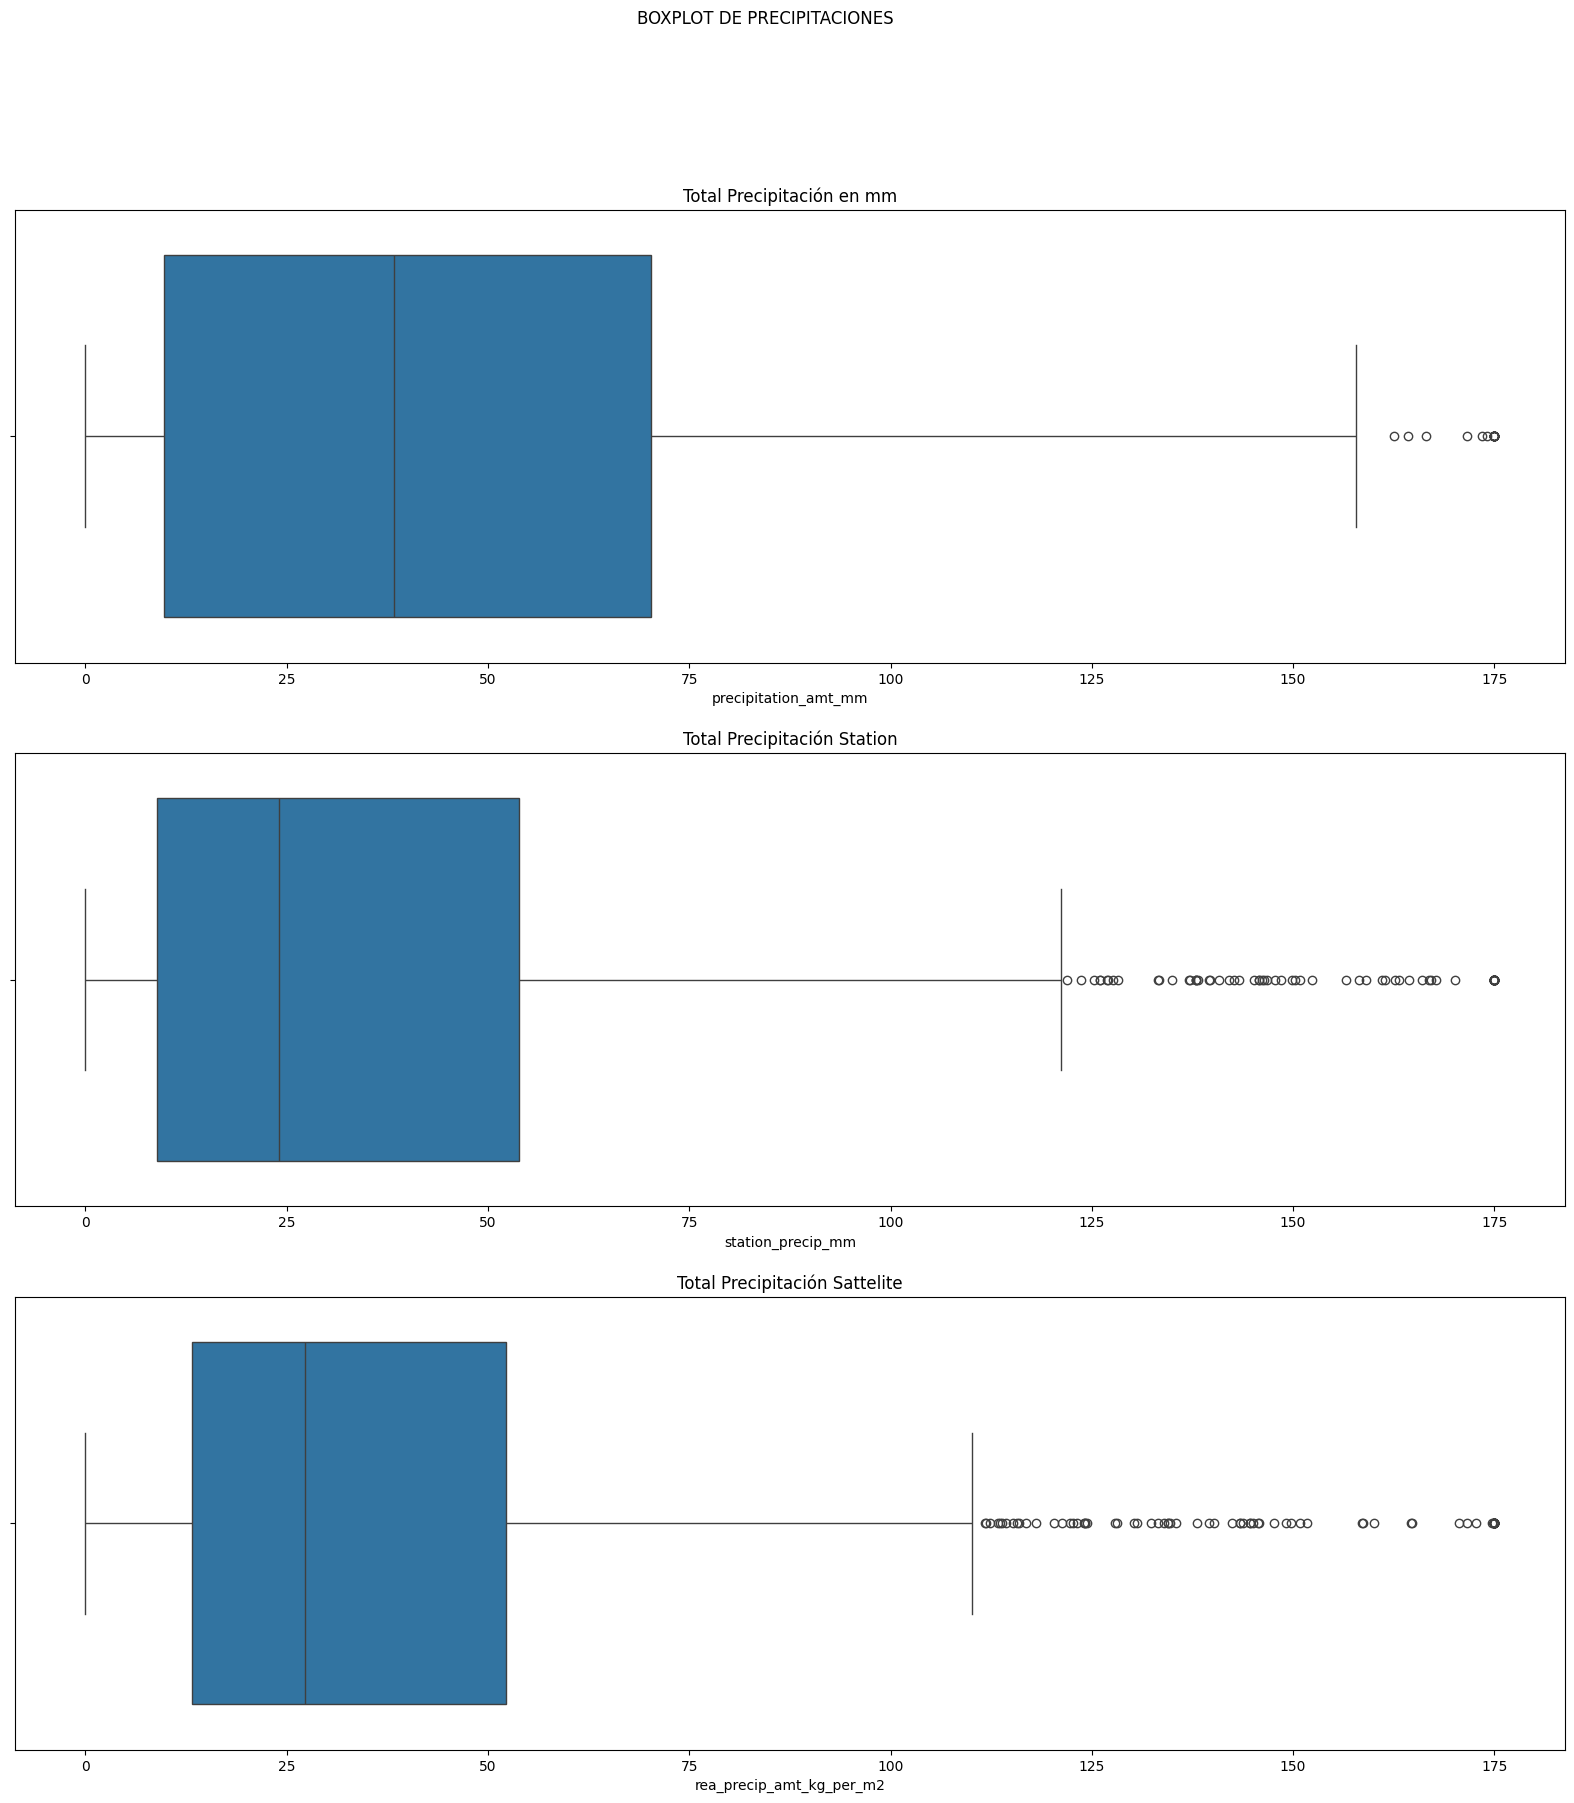

In [45]:
fig, axes = plt.subplots(3, 1, figsize=(20, 20))
fig.suptitle('BOXPLOT DE PRECIPITACIONES')

#precipitation_amt_mm
sns.boxplot(data=train, x='precipitation_amt_mm', ax=axes[0])
axes[0].set_title("Total Precipitación en mm")

#station_precip_mm
sns.boxplot(data=train, x='station_precip_mm', ax=axes[1])
axes[1].set_title("Total Precipitación Station")

#rea_precip_amnt_kg_per_m2
sns.boxplot(data=train, x='rea_precip_amt_kg_per_m2', ax=axes[2])
axes[2].set_title("Total Precipitación Sattelite")


```
Si bien no hemos eliminado por completo los outliers
hemos limitado su extensión
```


## Estandarización de las variables (normalización)

Para continuar con el análisis en este punto realizaré la normalización de las variables para analizar la relación entre ellas, especialmente de las variables relacionadas a la precipitación.

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   city                      1456 non-null   category      
 1   year                      1456 non-null   int64         
 2   week_start_date           1456 non-null   datetime64[ns]
 3   precipitation_amt_mm      1456 non-null   float64       
 4   station_precip_mm         1456 non-null   float64       
 5   ndvi                      1456 non-null   float64       
 6   max_temp_c                1456 non-null   float64       
 7   min_temp_c                1456 non-null   float64       
 8   temp_range_c              1456 non-null   float64       
 9   humedad                   1456 non-null   float64       
 10  rea_precip_amt_kg_per_m2  1456 non-null   float64       
 11  city_bin                  1456 non-null   int64         
dtypes: category(1), date

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_normal = train.copy() # Copia para normalizar
var_numericas = ['precipitation_amt_mm', 'station_precip_mm', 'ndvi',
                 'max_temp_c', 'min_temp_c', 'temp_range_c', 'humedad', 'rea_precip_amt_kg_per_m2']


In [48]:
# Normalización de todas las variables numéricas del dataset
train_normal[var_numericas] = scaler.fit_transform(train[var_numericas])

### Análisis de precipitaciones

Una vez normalizados los valores, compararemos las distintas variables de precipitaciones con el fin de determinar las relaciones entre ellas.

In [49]:
# Variables a visualizar/analizar
features = ['precipitation_amt_mm',
            'station_precip_mm',
            'rea_precip_amt_kg_per_m2']

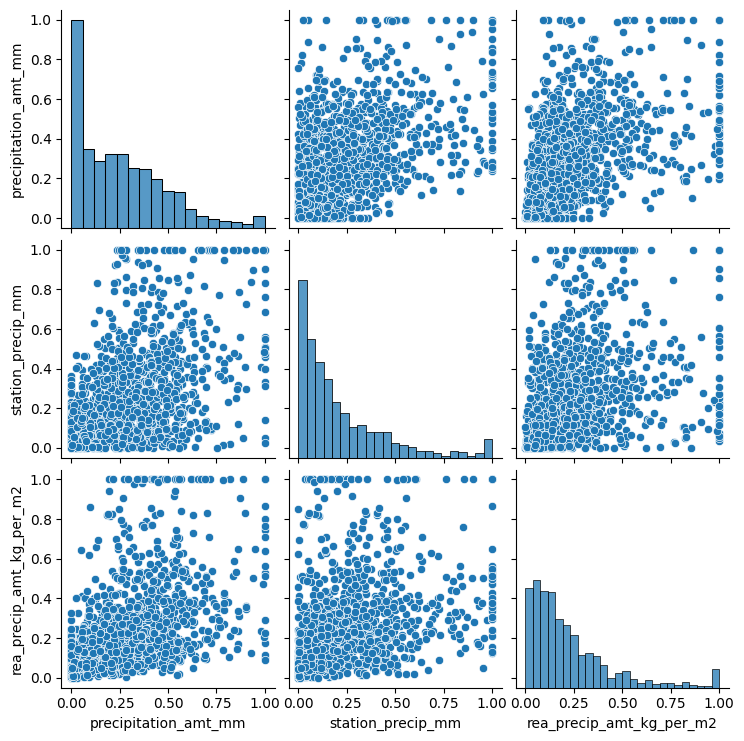

In [50]:
sns.pairplot(train_normal[features])
plt.show()

```
Aqui podemos graficamante visualizar que hay dos gráficas muy similares:

- precip_amt_mm ~ station_precip_mm
- precip_amt_mm ~ rea_precip_amnt_kg_per_m2

Siendo que ambas variables miden algo similar pero con unidades
ligeramente diferentes, podemos precindir de una de ellas.
```

Esto talves lo pudimos haber realizado con anterioridad, tan solo con visualizar las etiquetas de su descripción:

`reanalysis_precip_amt_kg_per_m2` – Total precipitation (Se elimina)
`station_precip_mm` – Total precipitation

Sin embargo ahora tenemos mejores argumentos para realizalo.

Eliminando esta variable nos queda la relación existente entre:

`station_precip_mm` – Total precipitation (Weather Statio)
`precip_amt_mm` - Total precipitation (Satellite)

dos medidas de precipitación una medida desde el espacio y otra terrestre.

En este punto no sabemos cual de las dos nos brindará los mejores resultados, por lo que optamos por mantenerlas a las dos.

In [51]:
# Eliminamos la columna redundante:

train_normal.drop(['rea_precip_amt_kg_per_m2'], axis = 1, inplace = True)

### Análisis de Temperatura

De la misma manera realizaremos un análisis de las variables de temperatura

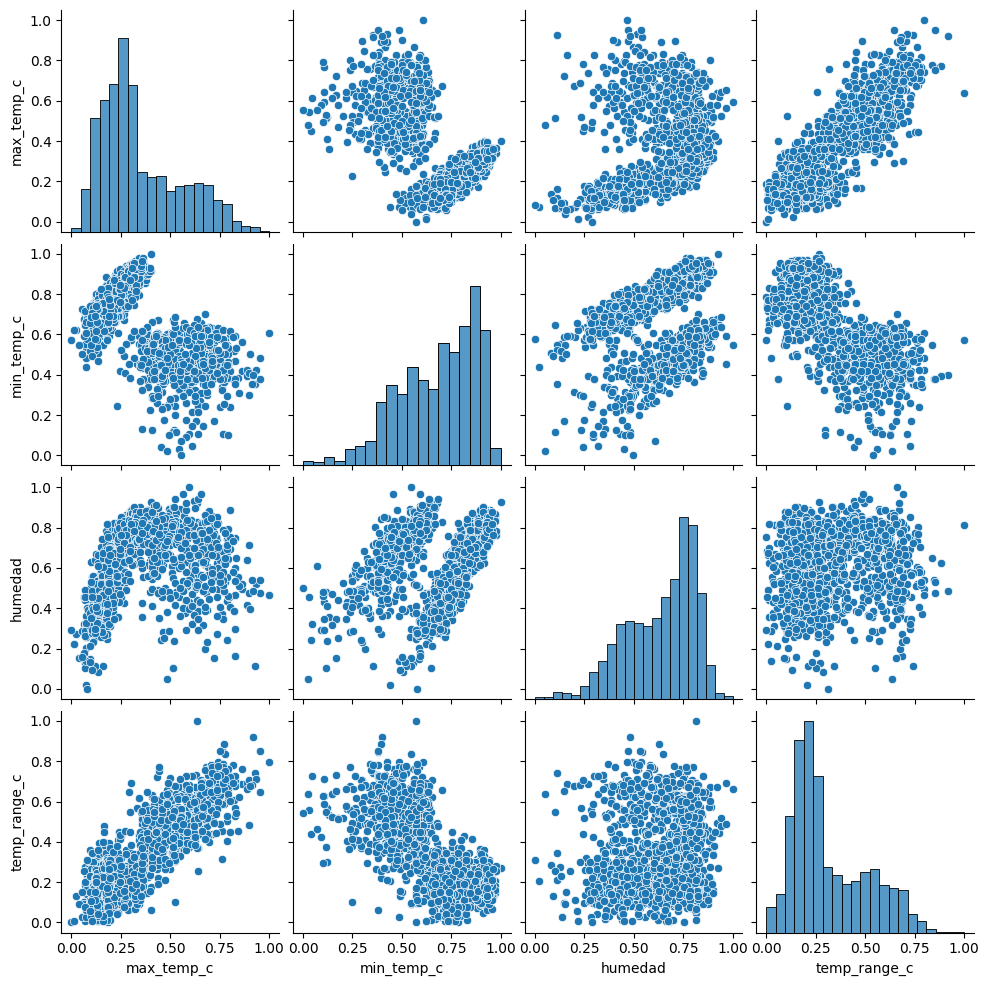

In [52]:
# Variables a visualizar/analizar
features = ['max_temp_c',
            'min_temp_c',
            'humedad',
            'temp_range_c']

sns.pairplot(train_normal[features])
plt.show()

```
Rápidamente podemos notar la relación lineal positiva entre:

 - temp_range_c  ~  max_temp_c

Podemos interpretar esta relación como que la información del rango
de temperatura se encuentra ya codificada en la temperatura máxima.

De una manera similar existe la relación con la variable min_temp_c
sin embargo esta no es tan marcada como con la positiva.

Concluimos que podemos eliminar la variable temp_range_c

Algo interesante es observar la relación entre temperatura mínimia y
humedad, donde podemos observar dos clustes claramente marcados.

Esto se debe a los datos de las dos ciudades como ya habiamos
analizado previamente.
```

La temperatura mínima nos ayuda a distinguir entre ambas ciudades

In [53]:
# Eliminamos la columna redundante:

train_normal.drop(['temp_range_c'], axis = 1, inplace = True)

In [54]:
train_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   city                  1456 non-null   category      
 1   year                  1456 non-null   int64         
 2   week_start_date       1456 non-null   datetime64[ns]
 3   precipitation_amt_mm  1456 non-null   float64       
 4   station_precip_mm     1456 non-null   float64       
 5   ndvi                  1456 non-null   float64       
 6   max_temp_c            1456 non-null   float64       
 7   min_temp_c            1456 non-null   float64       
 8   humedad               1456 non-null   float64       
 9   city_bin              1456 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(6), int64(2)
memory usage: 104.0 KB


---
# Clustering
---

## Algoritmo jerarquicos

Hasta este punto contamos con siete variables numéricas (incluyendo la binaria de ciudad)

Procederemos a realizar el análisis jerarquico de los datos


In [55]:
# Preparamos las dependencias

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [56]:
# Realización del clustering de las variables numéricas.

Z = linkage(train_normal.drop(['year','city','week_start_date'], axis=1), method='average', metric='euclidean')

In [57]:
# Calculo de la bondad del Cluster

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# pdist calcula las distancias entre elementos de nuestro dataset usando la
# métrica indicada (euclideana por defecto)
c, coph_dists = cophenet(Z, pdist(train_normal.drop(['year','city','week_start_date'], axis=1)))
c

0.9458692510761508

```
Para nuestro primer análisis jerarquico obtenemos un valor
de coeficiente de correlación muy próximo a uno, con lo que
nos indica que ha conservado adecuadamente las distancias originales
```

In [58]:

def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Dendograma de Cluster Jerarquico')
        plt.xlabel('indice or (tamaño del cluster)')
        plt.ylabel('distancia')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata




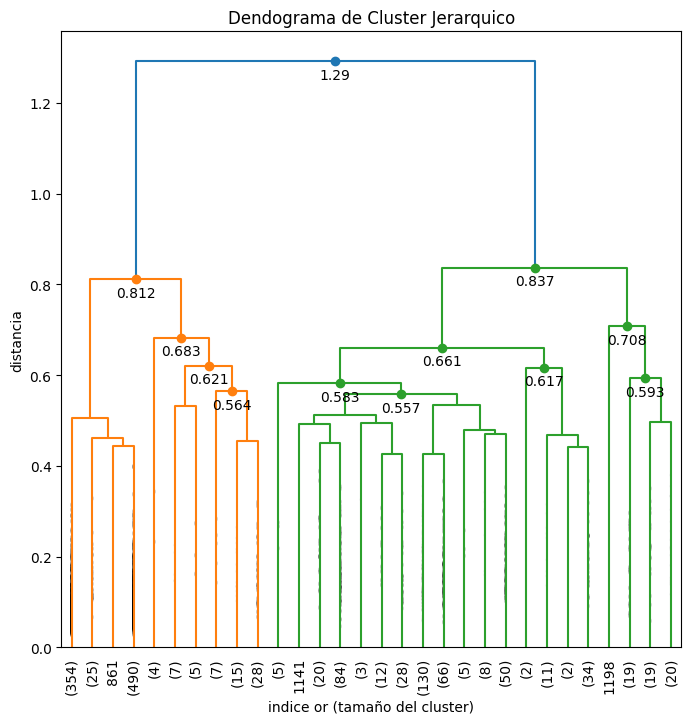

In [59]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above=0.55,  # useful in small plots so annotations don't overlap
)
plt.show()

La representación visual del cluster jerarquico a mi parecer es aceptable

- No hay demasiados outliers y los existentes se acoplan a los clusters.
- Nos da indicios de una primera aproximación **4 clusters** ya que tienen los 'clados' mas largos con pocos outliers.

Una segunda opción, con un tratamiento de outliers más agresivo puede ser obtener **5 grupos**



## K-means (7 variables)

En base al experimento anterior nos plantearemos construir cluster de 4 y 5 particiones inicialmente.

In [60]:
# Dependecias para k-means

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state=0, n_init = 10)
clusters = kmeans.fit_predict(train_normal.drop(['year','city','week_start_date'], axis=1))
kmeans.cluster_centers_.shape

(4, 7)

In [61]:
unique, counts = np.unique(kmeans.labels_ , return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 520]
 [  1 342]
 [  2 416]
 [  3 178]]


```
Vemos que para los primeros tres grupos existe una
distribución mas o menos uniforme, siendo el último
grupo menor a los demas.
```

In [62]:
# k-means_5
kmeans_5 = KMeans(n_clusters = 5, random_state=0, n_init = 10)
clusters = kmeans_5.fit_predict(train_normal.drop(['year','city','week_start_date'], axis=1))
unique_5, counts_5 = np.unique(kmeans_5.labels_ , return_counts=True)
print(np.asarray((unique_5, counts_5)).T)

[[  0 159]
 [  1 178]
 [  2 342]
 [  3 351]
 [  4 426]]


### Análsis de los clusters encontrados



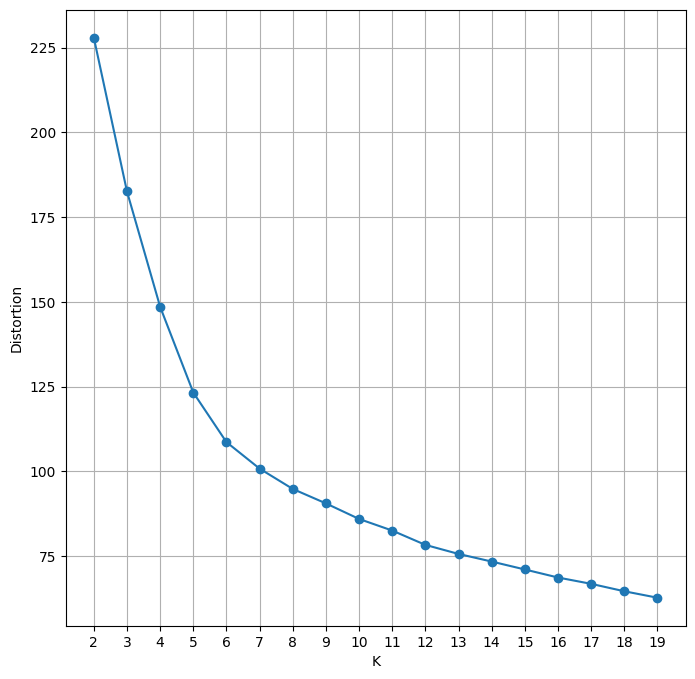

In [63]:
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 20):
    km = KMeans(i, init='random', n_init=10, max_iter=300, tol=1e-4, random_state = seed)
    clustering = km.fit_predict(train_normal.drop(['year','city','week_start_date'], axis=1))
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(train_normal.drop(['year','city','week_start_date'], axis=1), clustering))


plt.plot(range(2,20), distortions, marker='o')
plt.xticks(range(2, 20))
plt.xlabel('K')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()

In [65]:
!pip install kneed
import kneed


Elbow:  6


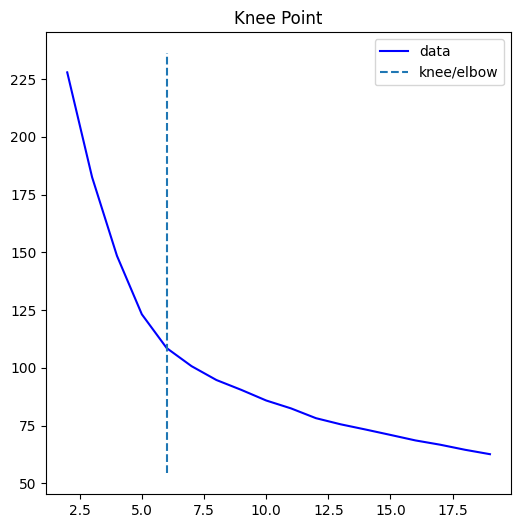

In [66]:
kneedle = kneed.KneeLocator(range(2, 20), distortions[:20], curve="convex", direction="decreasing")
elbow_point = kneedle.elbow
print('Elbow: ', elbow_point)
kneedle.plot_knee()

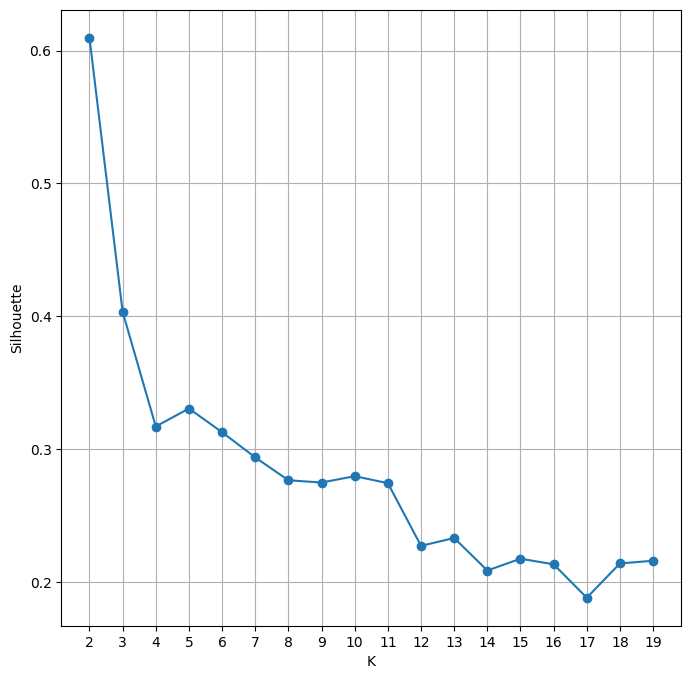

In [67]:
plt.plot(range(2,20), silhouettes , marker='o')
plt.xticks(range(2, 20))
plt.xlabel('K')
plt.ylabel('Silhouette')
plt.grid(True)
plt.show()

Como resultado de las analiticas corroboramos lo iniclamente encontrado con el cluster jerarquico, el número ideal de cluster esta entre 4 o 5, inclinandose hacia los cuatro clusters.

## PCA - Principal Componen Analysis


In [68]:
train_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   city                  1456 non-null   category      
 1   year                  1456 non-null   int64         
 2   week_start_date       1456 non-null   datetime64[ns]
 3   precipitation_amt_mm  1456 non-null   float64       
 4   station_precip_mm     1456 non-null   float64       
 5   ndvi                  1456 non-null   float64       
 6   max_temp_c            1456 non-null   float64       
 7   min_temp_c            1456 non-null   float64       
 8   humedad               1456 non-null   float64       
 9   city_bin              1456 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(6), int64(2)
memory usage: 104.0 KB


Además de la dimensión del tiempo, (que sería muy interesante un análisis de series temporales) y el hecho de que las muestras provienen de dos ciudades diferentes, en general, nuestras variables son:

- precipitación (lluvia)
- temperatura
- humedad
- vegetación

Incluso, si consideramos que la precipitación y humedad pueden llegar a estar acoplados, podriamos reducirlas a tres:

- precipitación (lluvia)
- temperatura
- vegetación


A continuación aplicaremos la técnica de PCA para reducir aún más la dimensionalidad de nuestro dataset.

Referencia: [Reduce data dimentionality using PCA](https://www.geeksforgeeks.org/reduce-data-dimentionality-using-pca-python/)

In [69]:
from sklearn.decomposition import PCA # to apply PCA

data_dengue = train_normal.drop(['year','city','week_start_date','city_bin'], axis=1)  # sin considerar ciudad

pca = PCA(n_components = 3)
pca.fit(data_dengue)
data_pca = pca.transform(data_dengue)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()


,PC1,PC2,PC3
0,-0.343,0.153,0.208
1,-0.277,0.067,0.043
2,-0.153,-0.142,0.079
3,-0.260,0.034,-0.089
4,-0.251,0.028,-0.138


Text(0.5, 1.0, 'Correlacion entre las PCA')

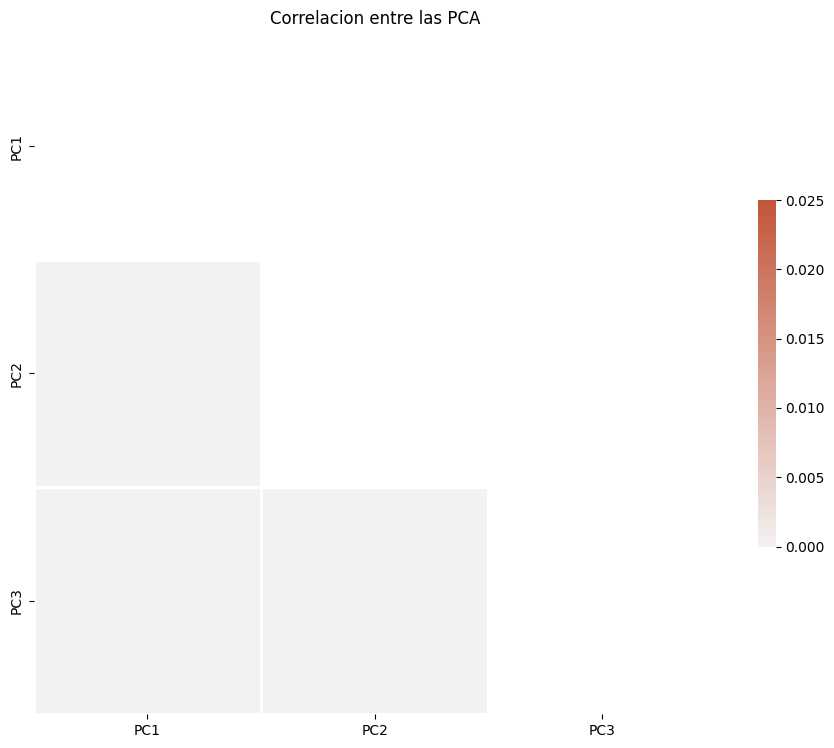

In [70]:
# Mascara
mask = np.triu(np.ones_like(data_pca.corr(), dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data_pca.corr(), mask=mask, cmap=cmap, vmax=0.025, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}).set_title("Correlacion entre las PCA")


Lo que nos indica el gráfico superior es que el nivel de correlación es muy bajo entre nuestras variables PCA, lo que nos indica que hemos obtenid una reducción adecuada de la dimensionalidad.

### K-means (PCA)

Volveremos a aplicar la misma técnica de K-means, pero esta vez en las variables PCA.


In [71]:
kmeans_PCA = KMeans(n_clusters = 4, random_state=0, n_init = 10)
clusters = kmeans_PCA.fit_predict(data_pca)
kmeans_PCA.cluster_centers_.shape

(4, 3)

In [72]:
unique, counts = np.unique(kmeans_PCA.labels_, return_counts=True)
print( "K-menas con PCA" )
print(np.asarray((unique, counts)).T)

unique, counts = np.unique(kmeans.labels_ , return_counts=True)
print( "K-menas siete variables" )
print(np.asarray((unique, counts)).T)

K-menas con PCA
[[  0 361]
 [  1 217]
 [  2 347]
 [  3 531]]
K-menas siete variables
[[  0 520]
 [  1 342]
 [  2 416]
 [  3 178]]


```
Se observa una distribución más uniforme de los grupos con la reducción de la dimensionalidad.
```

Esto puede ser bueno o malo, no lo sabemos realmente, pero se mantienen los dis grupos más grandes en proporciones similares. es posible que la redistribución de clusters se deba al PCA

<ipython-input-73-f0450c4c295f>:19: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
<ipython-input-73-f0450c4c295f>:20: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
<ipython-input-73-f0450c4c295f>:21: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))


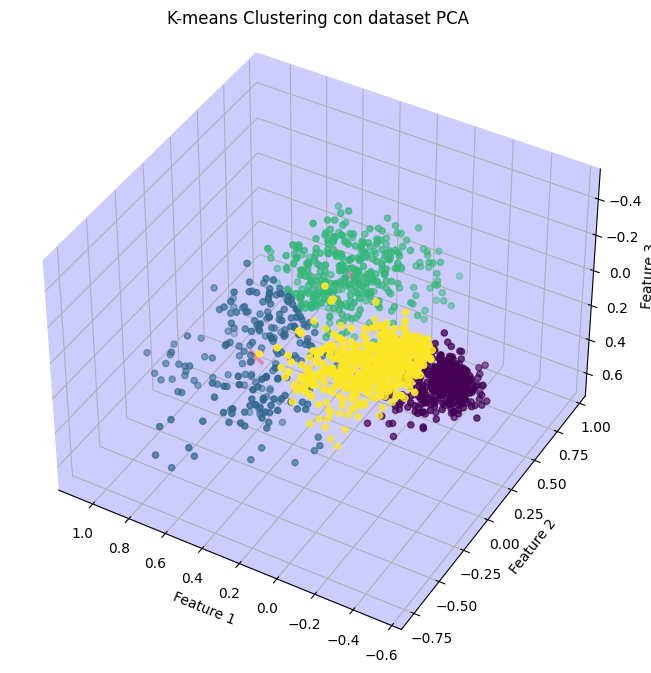

In [73]:
# Visualizacion del cluster PCA
# https://vbatopandas.blogspot.com/2023/12/k-means-clustering-3d-plot-swiss-roll.html

labels = kmeans_PCA.labels_

# Plot the data points and their cluster assignments
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Convert DataFrame columns to NumPy arrays
x = data_pca['PC1'].to_numpy()
y = data_pca['PC2'].to_numpy()
z = data_pca['PC3'].to_numpy()

ax.scatter(x, y, z, c = labels, cmap = 'viridis')
ax.scatter(kmeans_PCA.cluster_centers_[:, 0], kmeans_PCA.cluster_centers_[:, 1], kmeans_PCA.cluster_centers_[:, 2],
           marker='x', color='red', s=100 , linewidths=3)
# Set light blue background
ax.w_xaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.w_yaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.w_zaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.set_title("K-means Clustering con dataset PCA")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.view_init(-140, 60)
plt.show()

Visualmente podemos observar los grupos, es fácil diferecinar visualmente dos grupos (amarillo y purpura), sin embargo los consecuentes dos grupos no hay una visualización tan precisa.

En base al resultado visual, intentaremos reducir el número de clústers a tres.

<ipython-input-74-b71307a5a849>:22: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
<ipython-input-74-b71307a5a849>:23: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
<ipython-input-74-b71307a5a849>:24: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))


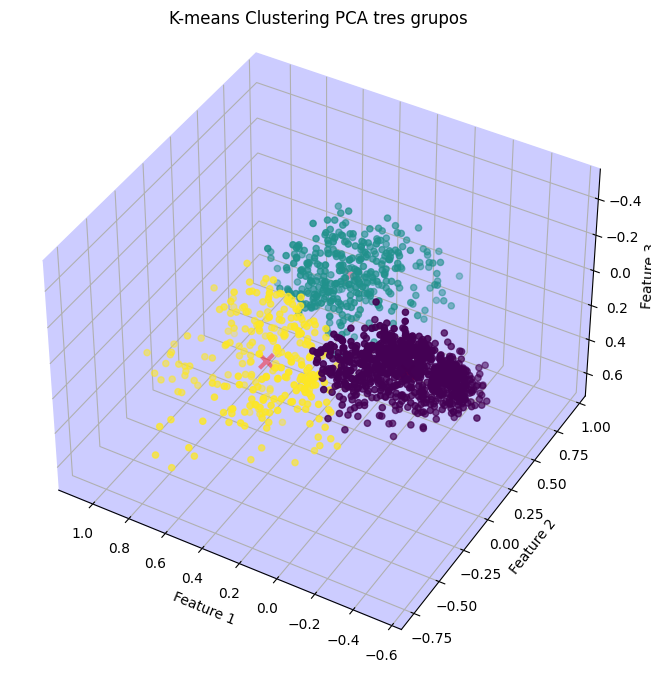

In [74]:
kmeans_Tres = KMeans(n_clusters = 3, random_state=0, n_init = 10)
clusters = kmeans_Tres.fit_predict(data_pca)
kmeans_PCA.cluster_centers_.shape

labels = kmeans_Tres.labels_

# Plot the data points and their cluster assignments
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Convert DataFrame columns to NumPy arrays
x = data_pca['PC1'].to_numpy()
y = data_pca['PC2'].to_numpy()
z = data_pca['PC3'].to_numpy()

ax.scatter(x, y, z, c = labels, cmap = 'viridis')
ax.scatter(kmeans_Tres.cluster_centers_[:, 0],
           kmeans_Tres.cluster_centers_[:, 1],
           kmeans_Tres.cluster_centers_[:, 2],
           marker='x', color='red', s=100 , linewidths=3)
# Set light blue background
ax.w_xaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.w_yaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.w_zaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.set_title("K-means Clustering PCA tres grupos")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.view_init(-140, 60)
plt.show()

<ipython-input-75-1e1b36b78b88>:16: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
<ipython-input-75-1e1b36b78b88>:17: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
<ipython-input-75-1e1b36b78b88>:18: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))


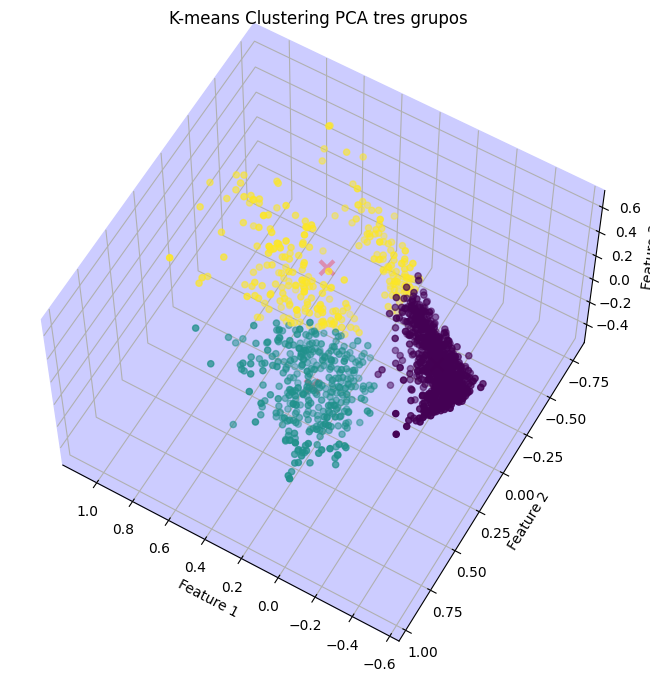

In [75]:
# Plot the data points and their cluster assignments
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Convert DataFrame columns to NumPy arrays
x = data_pca['PC1'].to_numpy()
y = data_pca['PC2'].to_numpy()
z = data_pca['PC3'].to_numpy()

ax.scatter(x, y, z, c = labels, cmap = 'viridis')
ax.scatter(kmeans_Tres.cluster_centers_[:, 0],
           kmeans_Tres.cluster_centers_[:, 1],
           kmeans_Tres.cluster_centers_[:, 2],
           marker='x', color='red', s=100 , linewidths=3)
# Set light blue background
ax.w_xaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.w_yaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.w_zaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.set_title("K-means Clustering PCA tres grupos")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.view_init(60, 120)
plt.show()

Visualmente no existe mejora, si algo ha emperoado, al menos visualmente, lo mas prudente será probar con otro tipo de métodos de cluster y con números de clúster mayores a cuatro.

## DBSCAN con PCA

Utilizamos una tercera técnica de clustering, para contrastar los resultados obtenidos hasta ahora

In [76]:
from sklearn.cluster import DBSCAN

<ipython-input-77-acdab43eab7f>:20: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
<ipython-input-77-acdab43eab7f>:21: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
<ipython-input-77-acdab43eab7f>:22: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))


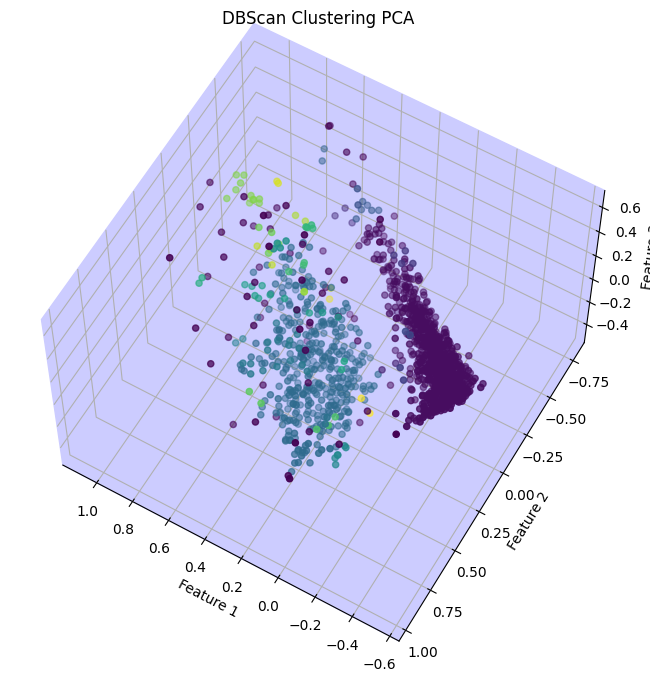

DBS con PCA
[[ -1  68]
 [  0 900]
 [  1   2]
 [  2   2]
 [  3   3]
 [  4   4]
 [  5   2]
 [  6   2]
 [  7   2]
 [  8   6]
 [  9   2]
 [ 10 378]
 [ 11   2]
 [ 12  16]
 [ 13   2]
 [ 14   6]
 [ 15   4]
 [ 16   2]
 [ 17   9]
 [ 18   2]
 [ 19   2]
 [ 20   4]
 [ 21   3]
 [ 22   3]
 [ 23   2]
 [ 24   4]
 [ 25  11]
 [ 26   2]
 [ 27   2]
 [ 28   3]
 [ 29   2]
 [ 30   2]
 [ 31   2]]


In [77]:
# Cluster data_pca into five clusters using dbscan
db = DBSCAN(eps=0.09, min_samples = 2)

db_dengue = db.fit(data_pca)

labels = db_dengue.labels_

# Plot the data points and their cluster assignments
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Convert DataFrame columns to NumPy arrays
x = data_pca['PC1'].to_numpy()
y = data_pca['PC2'].to_numpy()
z = data_pca['PC3'].to_numpy()

ax.scatter(x, y, z, c = labels, cmap = 'viridis')

# Set light blue background
ax.w_xaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.w_yaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.w_zaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.set_title("DBScan Clustering PCA")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.view_init(60, 120)
plt.show()

unique, counts = np.unique(db_dengue.labels_, return_counts=True)
print( "DBS con PCA" )
print(np.asarray((unique, counts)).T)

Utilizando DBSCAN lo mejor que logre particionar los datos es en dos grupos, de una manera similar al resultado obtenido con el particionamiento jerarquico.

Por lo que esta puede no resultar una tecnica adecuada para este dataset (o no me fue posible encontrar hiperparametros adecuados)

---
# Conclusiones
---

- Nuestra apuesta más segura hasta el momento es la técnica de **K-Means** sobre las tres variables obtenidas del **PCA** dividiendo nuestro dataset en **cuatro clústers**.

   - He llegado a esta conclusión luego de observar en el análisis jerarquico la presencia de estos cuatro grandes grupos.

   - Es importante tener un conocimiento adecuado de nuestras variables. No debemos verlos como los ve el computador, no son sólo números, nuestro rol es de conocer que representan, como se han recolectado, las limitaciones de los sensores utilizados, es con esta información (y si no la tenemos consultar con un experto en la materia) que nos permitirá tomar decisiones sobre como tratar los datos.

   - La Exploración y preparación de los datos es vital y las técnicas que utilicemos dependerán mucho sobre las transformaciones previas de los datos. Esto resulto evidente ya que inicialmente realice un análisis jerarquico sin considerar los valores 'outliers' y el resultado fue muy pobre.

- Trabajo Futuro:

   - Una mejor visualizción de los datos en 3D. Como se muestra en esta guía: [Interactive 3d Scatter Plot using Plotly](https://youtu.be/S_xVyF-hwZQ?t=231)

   - Una mejor interpretación de los datos basando en las ciudades. No me dió tiempo pero supongo que los dos grandes grupos observados en k-menas y DBscan se deben a las dos ciudades, pude haber visto sus centroides y análizado la frecuencia de la variable `city_bin`.

   - Un mejor tratamiento de outliers. Me quedo pendiente utilizar una verdadera técnica para el tratamiento de outliers.

   - Analisis de serie de tiempo. En todo el tratamiento y análisis no fue considerada una de las principales dimensiones. El tiempo. Considero muy necesario para este dataset el analizar y entender la evolución de los datos en el tiempo.